In [1]:
import math
import time

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import numpy as np
from casadi import *
from scipy.interpolate import CubicSpline

import importlib
import solvers_and_functions_package.Single_Wind as model
importlib.reload(model)


<module 'solvers_and_functions_package.Single_Wind' from 'C:\\Users\\irmas\\Documents\\TUM\\CaseCourse\\CasADi\\Main\\New_2D_model\\solvers_and_functions_package\\Single_Wind.py'>

#  check IPOPT tolerances

In [281]:
# tol
# 1e-6:     3.332925333702896       6.462
# 1e-8:     3.3329207246720234      6.811
# 1e-10:    3.3329205948277227      7.230
# 1e-12:    3.3329205943615205      7.764

# constr_viol_tol
# 1e-2:     3.3329207246720234      6.474
# 1e-4:     3.3329207246720234      6.811
# 1e-6:     3.3329207246720323      7.580
# 1e-8:     3.332920782200646       7.764


# tol
# 1e-6:     0.509238909644822       6.927
# 1e-8:     0.5092414686001339      6.880
# 1e-10:    0.5092415411308978      7.802
# 1e-12:    0.5092415413908868      8.083

# constr_viol_tol
# 1e-2:     0.5092414686001339      7.109
# 1e-4:     0.5092414686001339      6.880
# 1e-6:     0.5092414686001341      7.818
# 1e-8:     0.5092414669081549      8.029
k=1
s=1
A_w=model.A_wm1
B_w=model.B_wm1
integrator=model.rk4_step
pec = True
tol = 1e-8
constr_viol_tol = 1e-12


w,J  = model.solver_min_h_scaled(k_value=k,s_value=s,A_w=A_w,B_w=B_w,integrator=integrator,pesch_end_cond=pec, tol=tol,constr_viol_tol=constr_viol_tol)
print(J.item())

Total number of variables............................:      481
                     variables with only lower bounds:       81
                variables with lower and upper bounds:      160
                     variables with only upper bounds:        0
Total number of equality constraints.................:      401
Total number of inequality constraints...............:      160
        inequality constraints with only lower bounds:       80
   inequality constraints with lower and upper bounds:       80
        inequality constraints with only upper bounds:        0


Number of Iterations....: 28

                                   (scaled)                 (unscaled)
Objective...............:  -5.0924150249376221e-01   -5.0924150249376221e-01
Dual infeasibility......:   9.3173117055607433e-15    9.3173117055607433e-15
Constraint violation....:   4.6185277824406512e-14    4.6185277824406512e-14
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementari

# Wind Models
- We have two types of wind models, one of them also has a smoothing option
    - Picewise (1)
        - None Smooth 
        - Smooth (s)
    - Analytic (2)
- The wind has to parameters k and s, corresponding to windstrength and windshead width
    - k is around 1, less is weaker, more is stronger
    - s is around 1, less is smaller, more is bigger

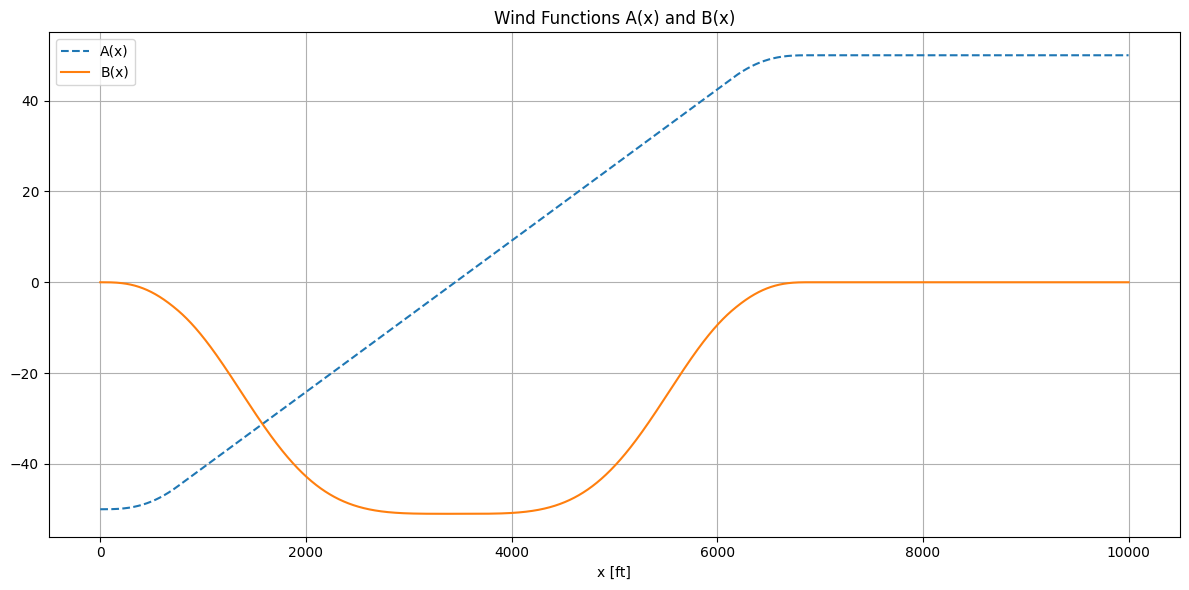

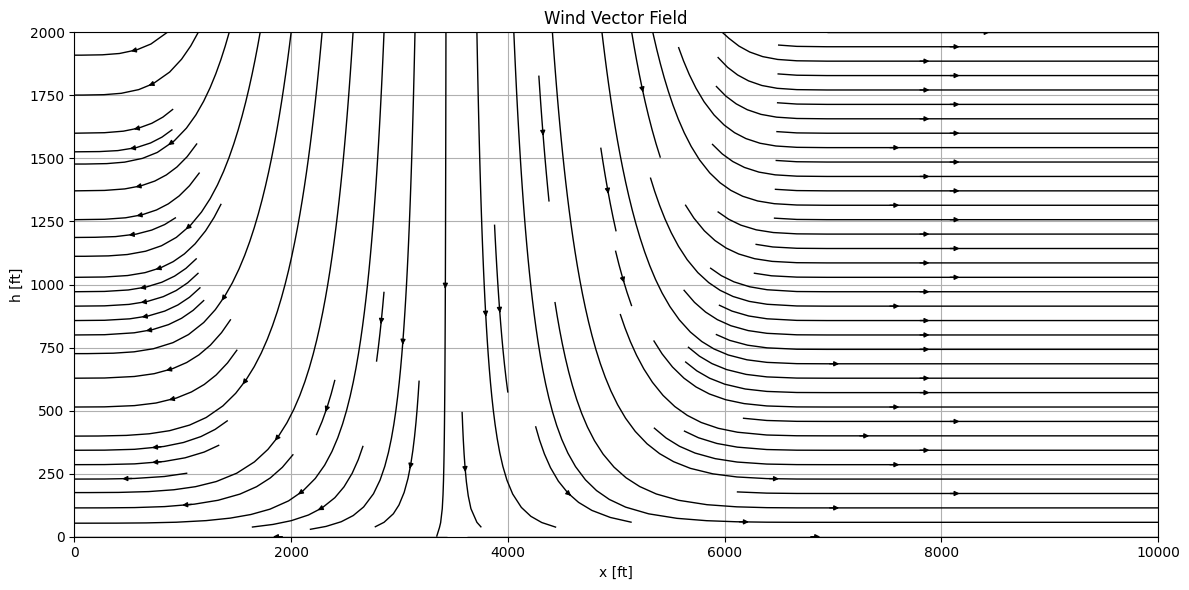

In [2]:
model.plot_wind(k=1,s=1.5,model=1,smooth=True)

# Difference between models
- Below are some plots showing the difference between the models
- As s differ from 1, the error of model 2, (or difference between model 1 and 2), increases for B
- Of course,the error appears at different points depending on s, (which controls the width)
- These differences will be amplified by k>1 and larger values of h (see formula for the full wind)
    - I say: if there is no need for a smooth or analytic wind, don't use them. If there is no time gain then just use the original model, and there are other non smooth parts of the model, so smoothing the wind alone does not really help.

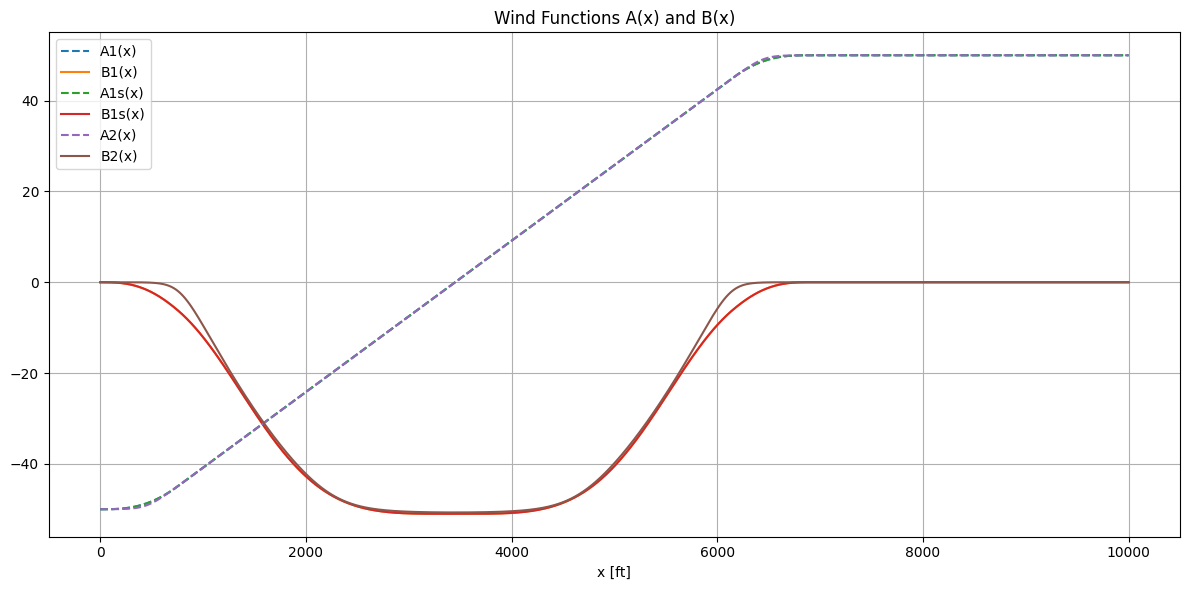

s = 1.5


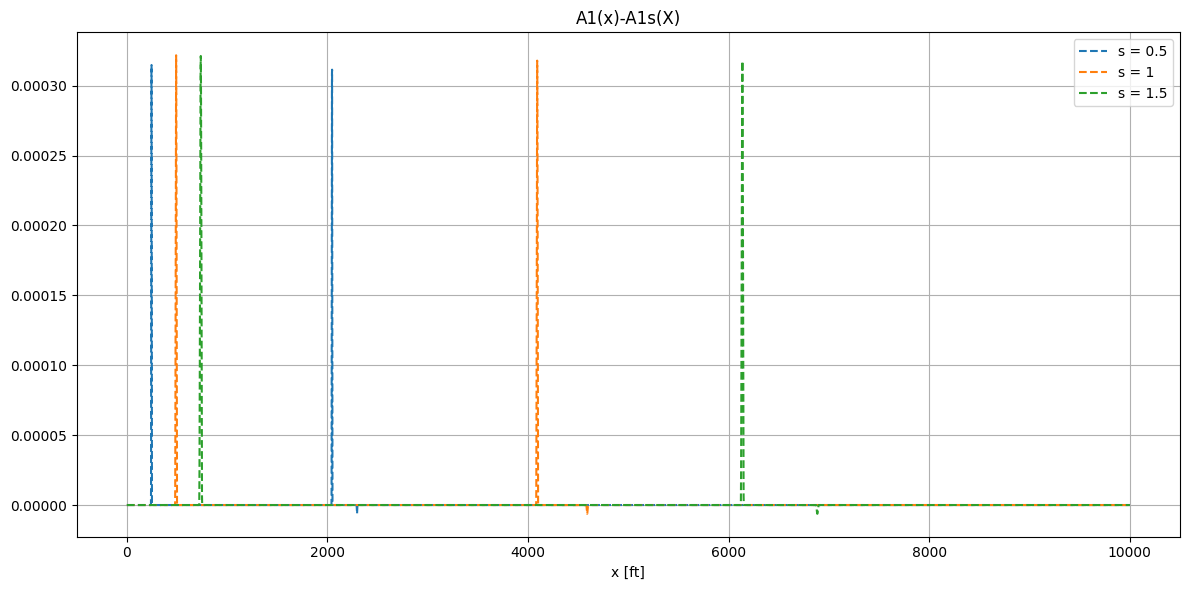

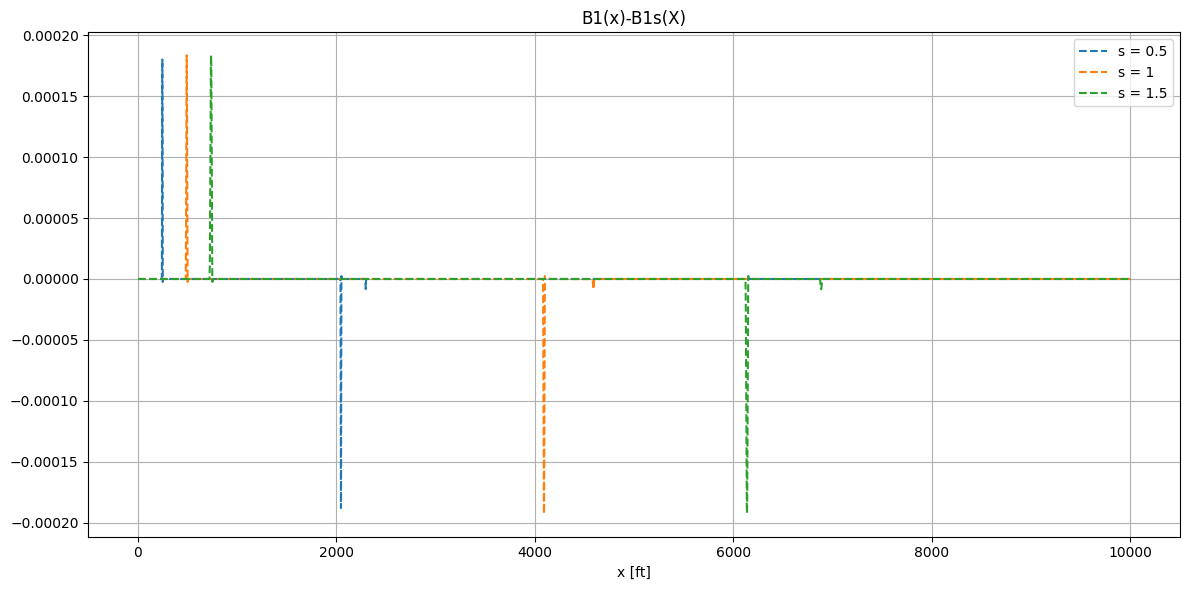

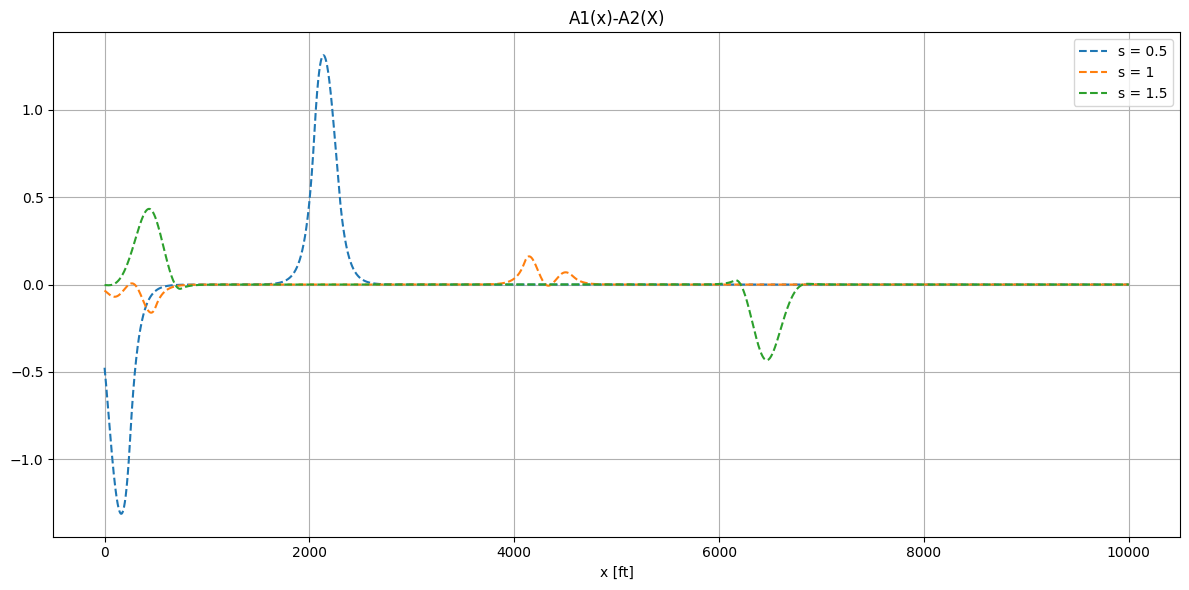

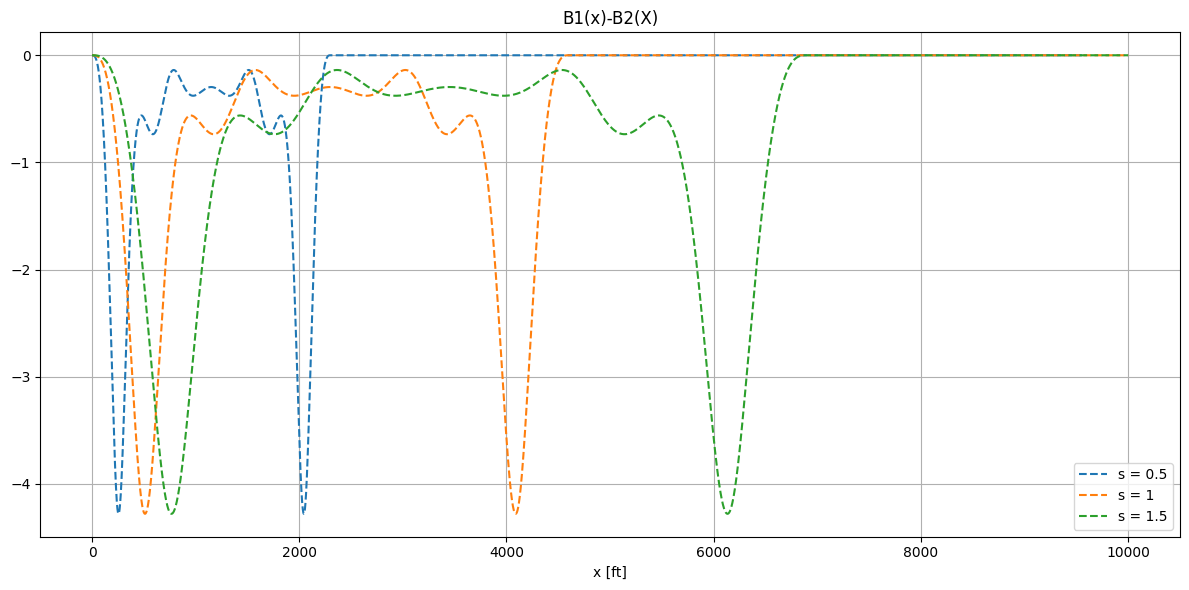

In [44]:
# Parameters
s1 = 0.5
s2 = 1
s3 = 1.5

s = 1.5

X = np.arange(0, 10001, 1)

# Winds
A1 = np.vectorize(model.A_wm1)
B1 = np.vectorize(model.B_wm1)
A1s = np.vectorize(model.A_wm1s)
B1s = np.vectorize(model.B_wm1s)
A2 = np.vectorize(model.A_wm2)
B2 = np.vectorize(model.B_wm2)

# Plot A(x) and B(x)
plt.figure(figsize=(12, 6))
plt.plot(X, A1(X, s), '--', label='A1(x)')
plt.plot(X, B1(X, s), '-', label='B1(x)')
plt.plot(X, A1s(X, s), '--', label='A1s(x)')
plt.plot(X, B1s(X, s), '-', label='B1s(x)')
plt.plot(X, A2(X, s), '--', label='A2(x)')
plt.plot(X, B2(X, s), '-', label='B2(x)')
plt.title('Wind Functions A(x) and B(x)')
plt.xlabel('x [ft]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print('s =',s)

# Plot A(x) and B(x)
plt.figure(figsize=(12, 6))
plt.plot(X, A1(X, s1)-A1s(X,s1), '--', label=f"s = {s1}")
plt.plot(X, A1(X, s2)-A1s(X,s2), '--', label=f"s = {s2}")
plt.plot(X, A1(X, s3)-A1s(X,s3), '--', label=f"s = {s3}")
plt.title('A1(x)-A1s(X)')
plt.xlabel('x [ft]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(X, B1(X, s1)-B1s(X,s1), '--', label=f"s = {s1}")
plt.plot(X, B1(X, s2)-B1s(X,s2), '--', label=f"s = {s2}")
plt.plot(X, B1(X, s3)-B1s(X,s3), '--', label=f"s = {s3}")
plt.title('B1(x)-B1s(X)')
plt.xlabel('x [ft]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(X, A1(X, s1)-A2(X,s1), '--', label=f"s = {s1}")
plt.plot(X, A1(X, s2)-A2(X,s2), '--', label=f"s = {s2}")
plt.plot(X, A1(X, s3)-A2(X,s3), '--', label=f"s = {s3}")
plt.title('A1(x)-A2(X)')
plt.xlabel('x [ft]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(X, B1(X, s1)-B2(X,s1), '--', label=f"s = {s1}")
plt.plot(X, B1(X, s2)-B2(X,s2), '--', label=f"s = {s2}")
plt.plot(X, B1(X, s3)-B2(X,s3), '--', label=f"s = {s3}")
plt.title('B1(x)-B2(X)')
plt.xlabel('x [ft]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Pesch Comparison
- Using Pesch end condition
- Pesch wind model (non-smooth)
- We use RK4 and N_u = 80
- The result is consistent with the result of Pesch -> We are confident in our solver


In [ ]:
k=1
s=1

A_w = model.A_wm1
B_w = model.B_wm1

integrator_b = model.rk4_step_bolza
integrator_h = model.rk4_step

pec = True
tol = 1e-10
constr_viol_tol = 1e-6

wb,Jb = model.solver_bolza_scaled(k_value=k, s_value=s,A_w=A_w,B_w=B_w,pesch_end_cond=pec,integrator=integrator_b,N=320)
wh,Jh = model.solver_min_h_scaled(k_value=k, s_value=s,A_w=A_w,B_w=B_w,pesch_end_cond=pec,integrator=integrator_h,N=320)

sol_b=model.sol_dictonary(wb,True,True)
sol_h=model.sol_dictonary(wh,False,True)

print(f"min altitude, bolza: {min(sol_b['h'])}")
print(f"min altitude, min h: {min(sol_h['h'])}")

print(f"bolza obj, bolza: {Jb.item()*model.params.inv_scale_Q}")
print(f"bolza obj, min h: {Jh.item()*model.params.inv_scale_Q}")

# Prep
A = np.vectorize(A_w)
B = np.vectorize(B_w)

x_grid = np.linspace(0, 10000, 200)
h_grid = np.linspace(0, 1500, 100)
X, H = np.meshgrid(x_grid, h_grid)

U = k * A(X,s)
V = k * H * B(X,s) / model.params.h_star


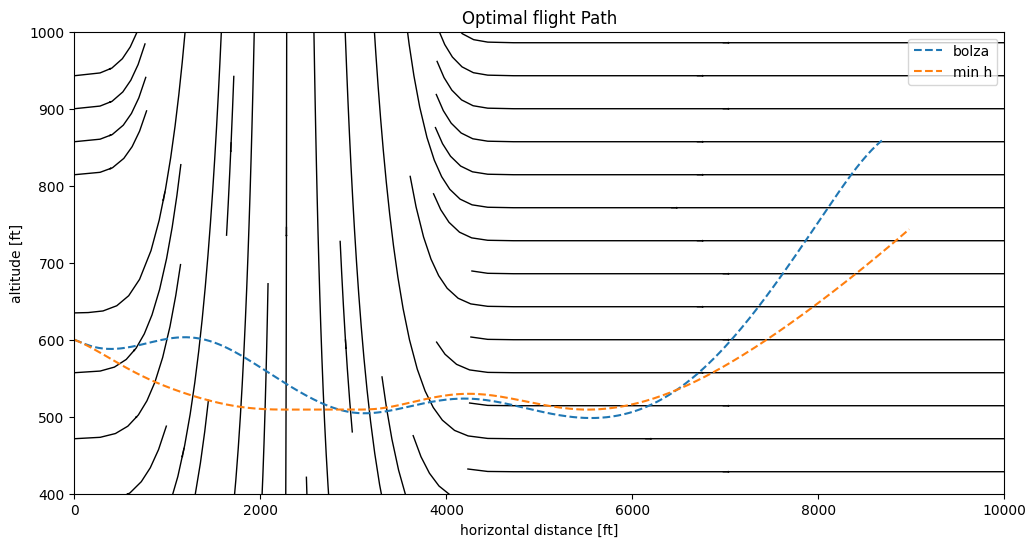

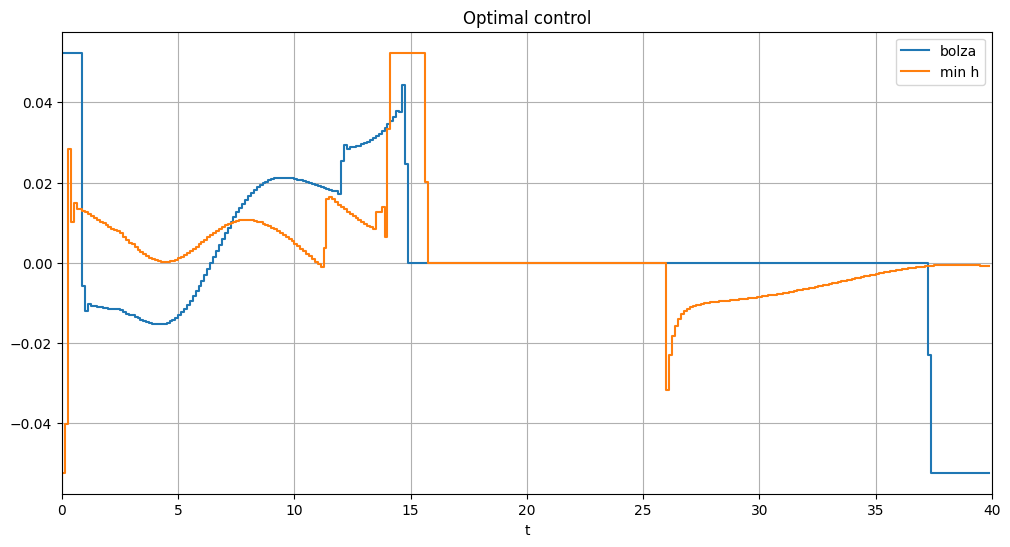

In [5]:

plt.figure(figsize=(12, 6))
plt.streamplot(
    X, H, U, V,
    color='black', linewidth=1, density=1.2, arrowsize=0.1
)
plt.plot(sol_b['x'], sol_b['h'], '--',label='bolza')
plt.plot(sol_h['x'], sol_h['h'], '--',label='min h')
plt.xlabel('horizontal distance [ft]')
plt.ylabel('altitude [ft]')
plt.title('Optimal flight Path')
plt.xlim([0, 10000])
plt.ylim([400, 1000])
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.clf()
plt.step(sol_b['t_grid'][:-1], sol_b['u'], label='bolza')
plt.step(sol_h['t_grid'][:-1], sol_h['u'], label='min h')
plt.xlabel('t')
plt.legend()
plt.title('Optimal control')
plt.grid()
plt.xlim([0, 40])
plt.show()

# Test Opt control

In [176]:
# Bolza
k=1
s=1
A_w = model.A_wm1
B_w = model.B_wm1
integrator_b = model.rk4_step_bolza
integrator_h = model.rk4_step
pec = False
tol = 1e-9
constr_viol_tol = 1e-4

wb,Jb = model.solver_bolza_scaled(k_value=k, s_value=s,A_w=A_w,B_w=B_w,pesch_end_cond=pec,integrator=integrator_b,tol=tol, constr_viol_tol=constr_viol_tol)

ub = model.u_opt_return(wb,True, True)
Jb = Jb*float(model.params.inv_scale_Q)
sol = model.trajectory_computation_dictonary(ub,k,s,A_w,B_w)
Jb = float(sol['J'])


N = len(ub)
eps = 0.01*model.params.umax
J_vals = []
J_vals_violations = []

for i in range(N):
    u_perturbed = ub.copy()
    u_perturbed[i] += eps
    sol = model.trajectory_computation_dictonary(u_perturbed,k,s,A_w,B_w)
    if min(sol['hdotdot'])<-2*model.params.g:
        J_vals_violations.append(float(sol['J']))
    elif min(sol['hdotdot'])>10*model.params.g:
        J_vals_violations.append(float(sol['J'])) 
    elif max(sol['alpha'])>model.params.alphamax+constr_viol_tol:
        J_vals_violations.append(float(sol['J'])) 
    elif u_perturbed[i]>model.params.umax+constr_viol_tol:
        J_vals_violations.append(float(sol['J'])) 
    elif u_perturbed[i]<-model.params.umax-constr_viol_tol:
        J_vals_violations.append(float(sol['J'])) 
    elif pec is True and (sol['gamma'][-1]<7.431 * pi / 180-(constr_viol_tol) or sol['gamma'][-1]>7.431 * pi / 180+(constr_viol_tol)):
        J_vals_violations.append(float(sol['J'])) 
    elif pec is False and sol['gamma'][-1]<-(constr_viol_tol):
        J_vals_violations.append(float(sol['J'])) 
    else:
        J_vals.append(float(sol['J']))

  
for i in range(N):
    u_perturbed = ub.copy()
    u_perturbed[i] -= eps
    sol = model.trajectory_computation_dictonary(u_perturbed,k,s,A_w,B_w)
    if min(sol['hdotdot'])<-2*model.params.g:
        J_vals_violations.append(float(sol['J'])) 
    elif min(sol['hdotdot'])>10*model.params.g:
        J_vals_violations.append(float(sol['J'])) 
    elif max(sol['alpha'])>model.params.alphamax+constr_viol_tol:
        J_vals_violations.append(float(sol['J'])) 
    elif u_perturbed[i]>model.params.umax+constr_viol_tol:
        J_vals_violations.append(float(sol['J'])) 
    elif u_perturbed[i]<-model.params.umax-constr_viol_tol:
        J_vals_violations.append(float(sol['J'])) 
    elif pec is True and (sol['gamma'][-1]<7.431 * pi / 180-(constr_viol_tol) or sol['gamma'][-1]>7.431 * pi / 180+(constr_viol_tol)):
        J_vals_violations.append(float(sol['J'])) 
    elif pec is False and sol['gamma'][-1]<-(constr_viol_tol):
        J_vals_violations.append(float(sol['J'])) 
    else:
        J_vals.append(float(sol['J'])) 
        



print(len(J_vals))
print('computed optimal value: ', Jb)
print('min obj for other u, (with no violations): ', min(J_vals))
print('Difference, J_opt-J_new, we want neg: ', float(((Jb)-min(J_vals)))) 
print('Procent difference: ', ((Jb-min(J_vals))/Jb))

# Pesch=True: for defaulkt we get a sliglty better solution,but not significant, if we decrece the tolernce on the constraints, those trajectoeries are no longer valid, if we decrese eps, weget better, but then decrese  tolernce on the constraints, and they dispaer again, any movement in u quacly violets thefeasiblity, for alpha and gamma and umax spexciclly,we are in  a highly constrained, nearly-active region of the control spac,decresing tol makesno diffrence here
#Pesch=False, here decresing tol makes a diffrence, with this we can also be more condident that weonly get better for pesch true besuce weviolare the contrsiant more.


Total number of variables............................:      480
                     variables with only lower bounds:       80
                variables with lower and upper bounds:      160
                     variables with only upper bounds:        0
Total number of equality constraints.................:      400
Total number of inequality constraints...............:       81
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:       80
        inequality constraints with only upper bounds:        0


Number of Iterations....: 28

                                   (scaled)                 (unscaled)
Objective...............:   3.3328877187825054e+00    3.3328877187825054e+00
Dual infeasibility......:   1.5466794511809212e-14    1.5466794511809212e-14
Constraint violation....:   4.1122660832115798e-13    4.1122660832115798e-13
Variable bound violation:   2.9386372446538189e-08    2.9386372446538189e-08
Complementari

In [187]:
# min h
k=1
s=1
A_w = model.A_wm1
B_w = model.B_wm1
integrator_b = model.rk4_step_bolza
integrator_h = model.rk4_step
pec = False
tol = 1e-8
constr_viol_tol = 1e-10

wh,Jh = model.solver_min_h_scaled(k_value=k, s_value=s,A_w=A_w,B_w=B_w,pesch_end_cond=pec,integrator=integrator_h,tol=tol, constr_viol_tol=constr_viol_tol)

uh = model.u_opt_return(wh,False, True)
sol = model.trajectory_computation_dictonary(uh,k,s,A_w,B_w)
Jh = min(sol['h'])

N = len(uh)
eps = 0.01 * model.params.umax
J_vals = []
J_vals_violations = []
indexes = []

for i in range(N):
    u_perturbed = uh.copy()
    u_perturbed[i] += eps
    sol = model.trajectory_computation_dictonary(u_perturbed, k, s, A_w, B_w)
    if min(sol['hdotdot']) < -2 * model.params.g:
        J_vals_violations.append(min(sol['h']))
    elif min(sol['hdotdot']) > 10 * model.params.g:
        J_vals_violations.append(min(sol['h']))
    elif max(sol['alpha']) > model.params.alphamax + constr_viol_tol:
        J_vals_violations.append(min(sol['h']))
    elif u_perturbed[i] > model.params.umax + constr_viol_tol:
        J_vals_violations.append(min(sol['h']))
    elif u_perturbed[i] < -model.params.umax - constr_viol_tol:
        J_vals_violations.append(min(sol['h']))
    elif pec is True and (sol['gamma'][-1]<7.431 * pi / 180-(constr_viol_tol) or sol['gamma'][-1]>7.431 * pi / 180+(constr_viol_tol)):
        J_vals_violations.append(min(sol['h'])) 
    elif pec is False and sol['gamma'][-1]<-(constr_viol_tol):
        J_vals_violations.append(min(sol['h'])) 
    else:
        J_vals.append(float(min(sol['h'])))
        indexes.append(i)

for i in range(N):
    u_perturbed = uh.copy()
    u_perturbed[i] -= eps
    sol = model.trajectory_computation_dictonary(u_perturbed, k, s, A_w, B_w)
    if min(sol['hdotdot']) < -2 * model.params.g:
        J_vals_violations.append(min(sol['h']))
    elif min(sol['hdotdot']) > 10 * model.params.g:
        J_vals_violations.append(min(sol['h']))
    elif max(sol['alpha']) > model.params.alphamax + constr_viol_tol:
        J_vals_violations.append(min(sol['h']))
    elif u_perturbed[i] > model.params.umax + constr_viol_tol:
        J_vals_violations.append(min(sol['h']))
    elif u_perturbed[i] < -model.params.umax - constr_viol_tol:
        J_vals_violations.append(min(sol['h']))
    elif pec is True and (sol['gamma'][-1]<7.431 * pi / 180-(constr_viol_tol) or sol['gamma'][-1]>7.431 * pi / 180+(constr_viol_tol)):
        J_vals_violations.append(min(sol['h'])) 
    elif pec is False and sol['gamma'][-1]<-(constr_viol_tol):
        J_vals_violations.append(min(sol['h'])) 
    else:
        J_vals.append(float(min(sol['h'])))
        indexes.append(-i)
        
print("")
print('Number of accepted paths: ',len(J_vals))
print('computed optimal value: ', Jh)
print('min obj for other u, (with no violations): ', max(J_vals))
print('Difference, h_new-h_opt, we want neg: ', float((max(J_vals) - (Jh))))
print('Procent difference: ', ((Jh - max(J_vals)) / Jh))
print(J_vals)
print(indexes)


Total number of variables............................:      481
                     variables with only lower bounds:       81
                variables with lower and upper bounds:      160
                     variables with only upper bounds:        0
Total number of equality constraints.................:      400
Total number of inequality constraints...............:      161
        inequality constraints with only lower bounds:       81
   inequality constraints with lower and upper bounds:       80
        inequality constraints with only upper bounds:        0


Number of Iterations....: 25

                                   (scaled)                 (unscaled)
Objective...............:  -5.0924145631570905e-01   -5.0924145631570905e-01
Dual infeasibility......:   6.4810753486254991e-13    6.4810753486254991e-13
Constraint violation....:   5.0970339060540937e-12    5.0970339060540937e-12
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementari

# Single Wind - Numerical studies
- Integrator study ->  best order of accuracy = 2 (not continuous differentiable) (same for all winds)
    - Chosen integrator: RK4
- N_u study -> Convergence to same plot -> Pick N_u based on accurcy and speed

## Integrator Study
- Study show order of accuracy is 2, despite RK4 this is because of non-smoothes in the model
    - f should be at least 4 times continuously differentiable, its not even one
        - There are issues with Wind, u, beta, and C_L
- We still want RK4 because of stability region
    - Also euler is order 1 (so thats worse)
- Same result for all winds

## Integrator Study
- Order of accuracy
    - RK1 = 1 
    - RK2 = 2
    - RK4 = 2
    - RK6 = 2 
    - best order of accuracy = 2 (not continuous differentiable) (same for all winds) -> don't use RK1

In [300]:
# based on optimalcontrol for the bolza problem (can use min h as well)
# Test for diffrent k, s, WM, and integrators
k = 1
s = (1/k)**2    #(1/k)**2 
A_w = model.A_wm1       # wm1, wm1s, wm2
B_w = model.B_wm1       # wm1, wm1s, wm2
integrator = model.rk1_step_bolza
pec = True

N = 40
multipilers = [1] + list(range(10, 501, 10))
vals_end = []

w, _= model.solver_bolza_scaled(k_value=k,s_value=s,A_w=A_w,B_w=model.B_wm1,N=N,integrator=integrator,pesch_end_cond=pec)
sol_exact = model.trajectory_computation_dictonary(model.u_opt_return(w,False,True), k_value=k, s_value=s,A_w=A_w,B_w=B_w,multiplier=2000,N_org=N,integrator=integrator)
exact = [sol_exact['x'][-1],sol_exact['h'][-1],sol_exact['v'][-1],sol_exact['gamma'][-1],sol_exact['alpha'][-1]]

for i in range(len(multipilers)):
    sol = model.trajectory_computation_dictonary(model.u_opt_return(w,False,True), k_value=k, s_value=s,A_w=A_w,B_w=B_w,multiplier=multipilers[i],N_org=N,integrator=integrator)
    vals_end.append([sol['x'][-1],sol['h'][-1],sol['v'][-1],sol['gamma'][-1],sol['alpha'][-1]])

e0 = []
e1= []
e2 = []
e3 = []
e4 = []

for i in range(len(multipilers)):
    e0.append(abs(vals_end[i][0]-exact[0]))
    e1.append(abs(vals_end[i][1]-exact[1]))
    e2.append(abs(vals_end[i][2]-exact[2]))
    e3.append(abs(vals_end[i][3]-exact[3]))
    e4.append(abs(vals_end[i][4]-exact[4]))

e = [e0,e1,e2,e3,e4]

Total number of variables............................:      240
                     variables with only lower bounds:       40
                variables with lower and upper bounds:       80
                     variables with only upper bounds:        0
Total number of equality constraints.................:      201
Total number of inequality constraints...............:       40
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:       40
        inequality constraints with only upper bounds:        0


Number of Iterations....: 18

                                   (scaled)                 (unscaled)
Objective...............:   3.6215422032339188e+00    3.6215422032339188e+00
Dual infeasibility......:   2.1851153184626991e-13    2.1851153184626991e-13
Constraint violation....:   4.2152947798967944e-12    4.2152947798967944e-12
Variable bound violation:   2.9989450478495883e-08    2.9989450478495883e-08
Complementari

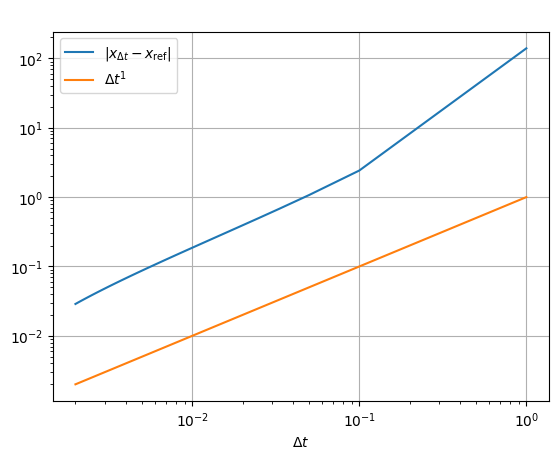

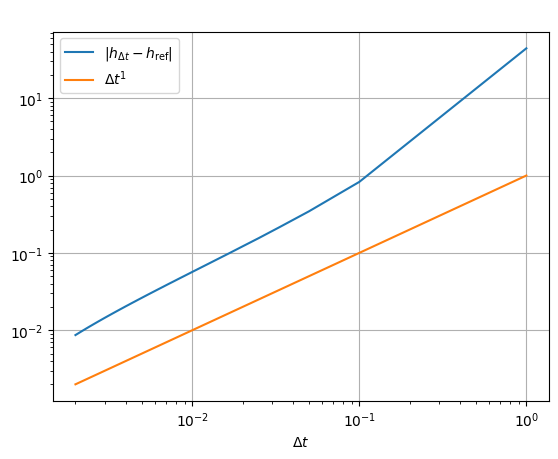

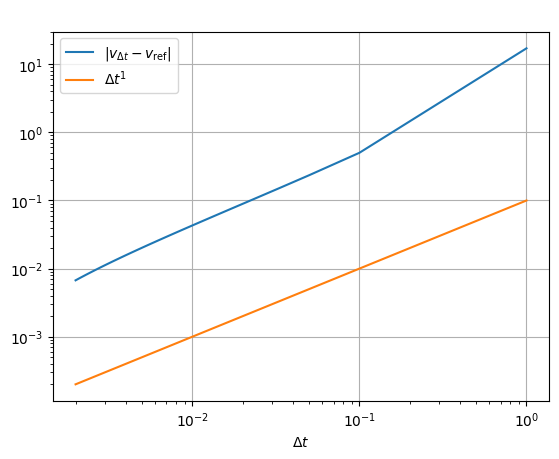

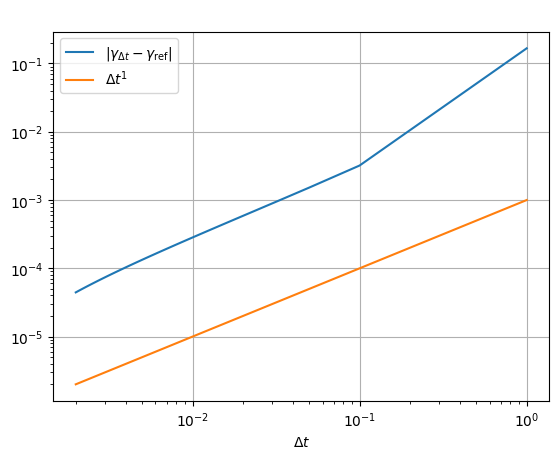

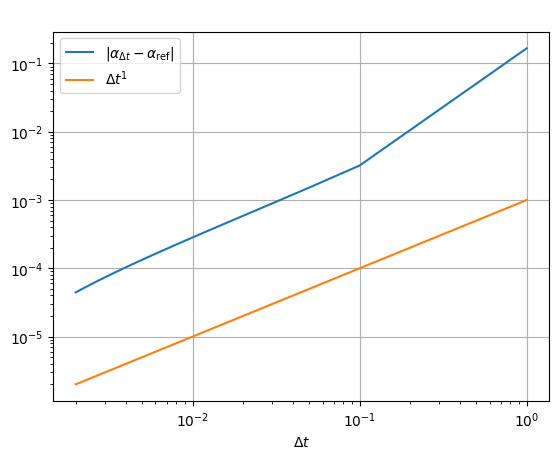

In [301]:
# Error plots

def accuracy_order_plots_h1(e,integrator_name: str):
    e0,e1,e2,e3,e4 = e
    hs = [model.params.tf/(x*N) for x in multipilers]
    hs2 = [x**1 for x in hs]
    hs2_scal1 = [0.1*x**1 for x in hs]
    hs2_scal2 = [0.001*x**1 for x in hs]
    
    
    plt.figure()
    plt.loglog(hs,e0, label=r"$|x_{\Delta t} - x_{\mathrm{ref}}|$")
    plt.loglog(hs,hs2, label=r"$\Delta t^1$")
    plt.grid(True)
    plt.legend()
    plt.xlabel(r"$\Delta t$")
    plt.title(integrator_name)
    plt.show()
    
    plt.figure()
    plt.loglog(hs,e1,label=r"$|h_{\Delta t} - h_{\mathrm{ref}}|$")
    plt.loglog(hs,hs2,label=r"$\Delta t^1$")
    plt.grid(True)
    plt.legend()
    plt.xlabel(r"$\Delta t$")
    plt.title(integrator_name)
    plt.show()
    
    plt.figure()
    plt.loglog(hs,e2, label=r"$|v_{\Delta t} - v_{\mathrm{ref}}|$")
    plt.loglog(hs,hs2_scal1,label=r"$\Delta t^1$")
    plt.grid(True)
    plt.legend()
    plt.xlabel(r"$\Delta t$")
    plt.title(integrator_name)
    plt.show()
    
    plt.figure()
    plt.loglog(hs,e3,label=r"$|{\gamma}_{\Delta t} - {\gamma}_{\mathrm{ref}}|$")
    plt.loglog(hs,hs2_scal2,label=r"$\Delta t^1$")
    plt.grid(True)
    plt.legend()
    plt.xlabel(r"$\Delta t$")
    plt.title(integrator_name)
    plt.show()
    
    plt.figure()
    plt.loglog(hs,e3,label=r"$|{\alpha}_{\Delta t} - {\alpha}_{\mathrm{ref}}|$")
    plt.loglog(hs,hs2_scal2,label=r"$\Delta t^1$")
    plt.grid(True)
    plt.legend()
    plt.xlabel(r"$\Delta t$")
    plt.title(integrator_name)
    plt.show()
    
def accuracy_order_plots_h2(e,integrator_name: str):
    e0,e1,e2,e3,e4 = e
    
    hs = [model.params.tf/(x*N) for x in multipilers]
    hs2 = [x**2 for x in hs]
    hs2_scal1 = [0.1*x**2 for x in hs]
    hs2_scal2 = [0.001*x**2 for x in hs]
    
    
    plt.figure()
    plt.loglog(hs,e0, label=r"$|x_{\Delta t} - x_{\mathrm{ref}}|$")
    plt.loglog(hs,hs2, label=r"$\Delta t^2$")
    plt.grid(True)
    plt.legend()
    plt.xlabel(r"$\Delta t$")
    plt.title(integrator_name)
    plt.show()
    
    plt.figure()
    plt.loglog(hs,e1,label=r"$|h_{\Delta t} - h_{\mathrm{ref}}|$")
    plt.loglog(hs,hs2,label=r"$\Delta t^2$")
    plt.grid(True)
    plt.legend()
    plt.xlabel(r"$\Delta t$")
    plt.title(integrator_name)
    plt.show()
    
    plt.figure()
    plt.loglog(hs,e2, label=r"$|v_{\Delta t} - v_{\mathrm{ref}}|$")
    plt.loglog(hs,hs2_scal1,label=r"$\Delta t^2$")
    plt.grid(True)
    plt.legend()
    plt.xlabel(r"$\Delta t$")
    plt.title(integrator_name)
    plt.show()
    
    plt.figure()
    plt.loglog(hs,e3,label=r"$|{\gamma}_{\Delta t} - {\gamma}_{\mathrm{ref}}|$")
    plt.loglog(hs,hs2_scal2,label=r"$\Delta t^2$")
    plt.grid(True)
    plt.legend()
    plt.xlabel(r"$\Delta t$")
    plt.title(integrator_name)
    plt.show()
    
    plt.figure()
    plt.loglog(hs,e3,label=r"$|{\alpha}_{\Delta t} - {\alpha}_{\mathrm{ref}}|$")
    plt.loglog(hs,hs2_scal2,label=r"$\Delta t^2$")
    plt.grid(True)
    plt.legend()
    plt.xlabel(r"$\Delta t$")
    plt.title(integrator_name)
    plt.show()

accuracy_order_plots_h1(e," ")


## Integrator Study
- Compare integrators
- k=1,s=1,WM1
- N= 20, 40, 80
    - Bolza
        - RK1: 0.31621171300299467, 0.5118232979997992, 1.642891426999122
        - RK2: 0.8224313459999394, 1.2365220189950197, 2.832078108002315
        - RK4: 1.3433419270039304, 2.515987778000417, 3.090301872000564
        - RK6: 5.365065347994678
    - min h
        - RK1: 1.002914930001134
        - RK2: 0.5339419020019704, 1.5027341340045677, 2.2946380410011624
        - RK4: 1.0502806000009877, 1.9686085920035838, 2.8039470460033042
        - RK6: 6.172355580009753

In [4]:
# Test for different k, s, WM, and integrators
k = 1
s = (1/k)**2    #(1/k)**2 
A_w = model.A_wm1       # wm1, wm1s, wm2
B_w = model.B_wm1       # wm1, wm1s, wm2
integrator = model.rk2_step_bolza
N = 160
T = 0

for i in range(10):
    start = time.perf_counter()
    w1, J1 = model.solver_bolza_scaled(k_value=k,s_value=s,A_w=A_w,B_w=model.B_wm1,N=N,integrator=integrator)
    end = time.perf_counter()
    T+= (end - start)
print(T/10)

# min h
# RK2 80    6.308188340000925
# RK2 160   4.891441530000884
# RK2 320
# RK2 80    
# RK2 160   3.8349349700059974
# RK2 320   12.345889420001185
# Bolza
# RK2 80    
# RK2 160   3.8349349700059974
# RK2 320   12.345889420001185
# RK4 80    
# RK4 160   3.8349349700059974
# RK4 320   12.345889420001185

Total number of variables............................:      960
                     variables with only lower bounds:      160
                variables with lower and upper bounds:      320
                     variables with only upper bounds:        0
Total number of equality constraints.................:      800
Total number of inequality constraints...............:      161
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:      160
        inequality constraints with only upper bounds:        0


Number of Iterations....: 32

                                   (scaled)                 (unscaled)
Objective...............:   3.3373762295160017e+00    3.3373762295160017e+00
Dual infeasibility......:   1.2538581284360362e-14    1.2538581284360362e-14
Constraint violation....:   1.7263079854501484e-11    1.7263079854501484e-11
Variable bound violation:   2.9893834074812276e-08    2.9893834074812276e-08
Complementari

In [17]:
# Test for different k, s, WM, and integrators
k = 1
s = (1/k)**2    #(1/k)**2 
A_w = model.A_wm1       # wm1, wm1s, wm2
B_w = model.B_wm1       # wm1, wm1s, wm2
integrator = model.rk2_step
N = 80
T = 0


w1, J1 = model.solver_min_h_scaled(k_value=k,s_value=s,A_w=A_w,B_w=model.B_wm1,N=N,integrator=integrator)


# min h
# RK2 80    4
# RK2 160   8  
# RK2 320   15
# RK4 80    6
# RK4 160   13
# RK4 320   20
# Bolza
# RK2 80    5
# RK2 160   10
# RK2 320   16
# RK4 80    10
# RK4 160   15
# RK4 320   30

Total number of variables............................:      481
                     variables with only lower bounds:       81
                variables with lower and upper bounds:      160
                     variables with only upper bounds:        0
Total number of equality constraints.................:      400
Total number of inequality constraints...............:      161
        inequality constraints with only lower bounds:       81
   inequality constraints with lower and upper bounds:       80
        inequality constraints with only upper bounds:        0


Number of Iterations....: 28

                                   (scaled)                 (unscaled)
Objective...............:  -5.0877566050733669e-01   -5.0877566050733669e-01
Dual infeasibility......:   4.5673625579682336e-12    4.5673625579682336e-12
Constraint violation....:   5.2663429173094300e-11    5.2663429173094300e-11
Variable bound violation:   2.8491810244446469e-08    2.8491810244446469e-08
Complementari

## Integrator Study
- Compare integrators
    - They all converge to the same solution

In [259]:
# Test for different k, s, WM, and integrators
k = 1
s = (1/k)**2    #(1/k)**2 
A_w = model.A_wm1       # wm1, wm1s, wm2
B_w = model.B_wm1       # wm1, wm1s, wm2
N = 20
sol1s = []
sol2s = []
sol3s = []
sol4s = []

for i in range(5):
    w, J = model.solver_bolza_scaled(k_value=k,s_value=s,A_w=A_w,B_w=model.B_wm1,N=N*2**i,integrator=model.rk1_step_bolza)
    sol1 = model.trajectory_computation_dictonary(model.u_opt_return(w,True,True),k,s,A_w,B_w,N_org=N*2**i,integrator=model.rk1_step_bolza)
    sol1s.append(sol1)
    w, J = model.solver_bolza_scaled(k_value=k,s_value=s,A_w=A_w,B_w=model.B_wm1,N=N*2**i,integrator=model.rk2_step_bolza)
    sol2 = model.trajectory_computation_dictonary(model.u_opt_return(w,True,True),k,s,A_w,B_w,N_org=N*2**i,integrator=model.rk2_step_bolza)
    sol2s.append(sol2)
    w, J = model.solver_bolza_scaled(k_value=k,s_value=s,A_w=A_w,B_w=model.B_wm1,N=N*2**i,integrator=model.rk4_step_bolza)
    sol3 = model.trajectory_computation_dictonary(model.u_opt_return(w,True,True),k,s,A_w,B_w,N_org=N*2**i,integrator=model.rk4_step_bolza)
    sol3s.append(sol3)
    w, J = model.solver_bolza_scaled(k_value=k,s_value=s,A_w=A_w,B_w=model.B_wm1,N=N*2**i,integrator=model.rk6_step_bolza)
    sol4 = model.trajectory_computation_dictonary(model.u_opt_return(w,True,True),k,s,A_w,B_w,N_org=N*2**i,integrator=model.rk6_step_bolza)
    sol4s.append(sol4)


Total number of variables............................:      120
                     variables with only lower bounds:       20
                variables with lower and upper bounds:       40
                     variables with only upper bounds:        0
Total number of equality constraints.................:      100
Total number of inequality constraints...............:       21
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:       20
        inequality constraints with only upper bounds:        0


Number of Iterations....: 22

                                   (scaled)                 (unscaled)
Objective...............:   4.1191854158989010e+00    4.1191854158989010e+00
Dual infeasibility......:   7.5495165674511049e-14    7.5495165674511049e-14
Constraint violation....:   1.1413092693146609e-13    1.1413092693146609e-13
Variable bound violation:   3.0006402251814279e-08    3.0006402251814279e-08
Complementari

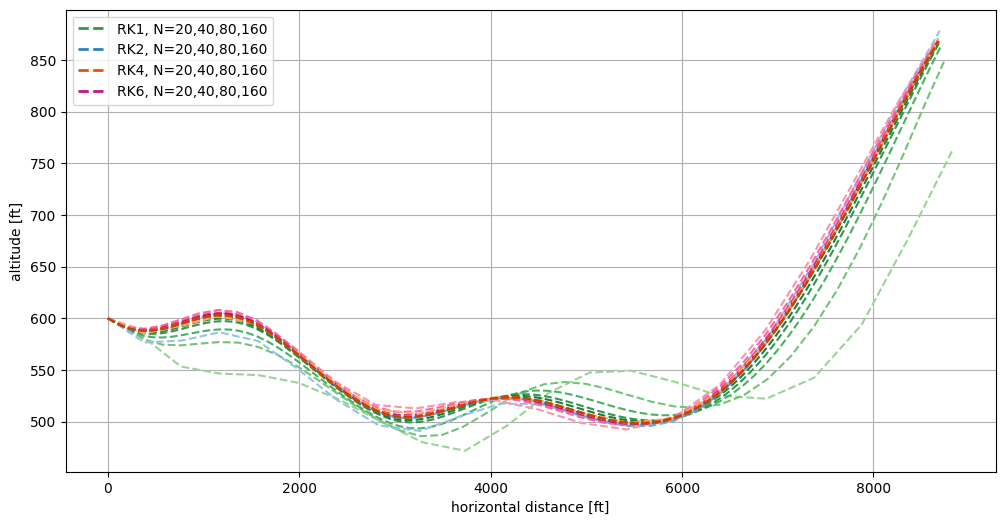

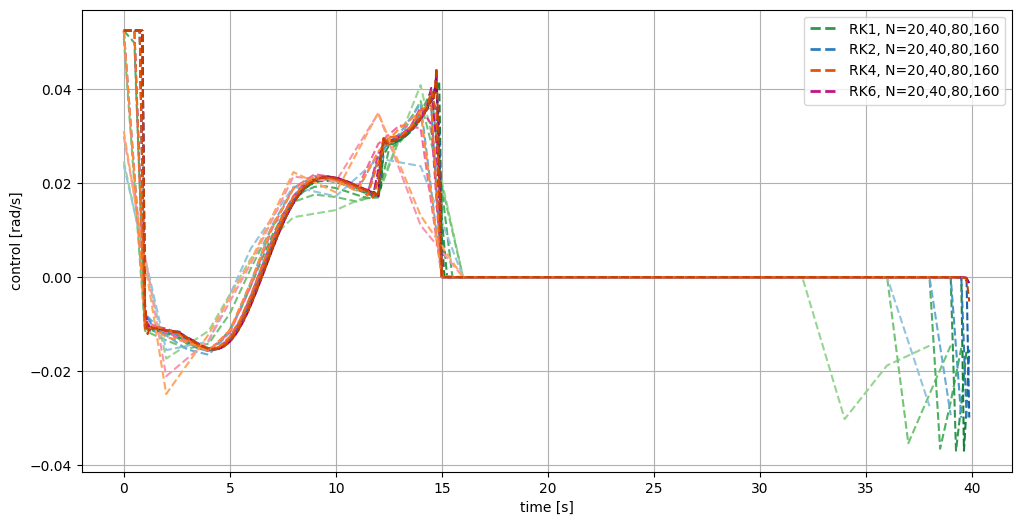

In [284]:
# only RK2 and RK4 are relevant

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(sol1s[i]['x'], sol1s[i]['h'], '--', color=cm.Greens(0.4 + 0.1 * i))
for i in range(5):
    plt.plot(sol2s[i]['x'], sol2s[i]['h'], '--', color=cm.Blues(0.4 + 0.1 * i))
for i in range(5):
    plt.plot(sol4s[i]['x'], sol4s[i]['h'], '--', color=cm.RdPu(0.4 + 0.1 * i))
for i in range(5):
    plt.plot(sol3s[i]['x'], sol3s[i]['h'], '--', color=cm.Oranges(0.4 + 0.1 * i))
legend_elements = [
    Line2D([0], [0], color=cm.Greens(0.7), lw=2, linestyle='--', label='RK1, N=20,40,80,160'),
    Line2D([0], [0], color=cm.Blues(0.7), lw=2, linestyle='--', label='RK2, N=20,40,80,160'),
    Line2D([0], [0], color=cm.Oranges(0.7), lw=2, linestyle='--', label='RK4, N=20,40,80,160'),
    Line2D([0], [0], color=cm.RdPu(0.7), lw=2, linestyle='--', label='RK6, N=20,40,80,160'),
]
plt.xlabel('horizontal distance [ft]')
plt.ylabel('altitude [ft]')
plt.legend(handles=legend_elements)
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(sol1s[i]['t_grid'][:-1], sol1s[i]['u'], '--', color=cm.Greens(0.4 + 0.1 * i))
for i in range(5):
    plt.plot(sol2s[i]['t_grid'][:-1], sol2s[i]['u'], '--', color=cm.Blues(0.4 + 0.1 * i))
for i in range(5):
    plt.plot(sol4s[i]['t_grid'][:-1], sol4s[i]['u'], '--', color=cm.RdPu(0.4 + 0.1 * i))
for i in range(5):
    plt.plot(sol3s[i]['t_grid'][:-1], sol3s[i]['u'], '--', color=cm.Oranges(0.4 + 0.1 * i))
legend_elements = [
    Line2D([0], [0], color=cm.Greens(0.7), lw=2, linestyle='--', label='RK1, N=20,40,80,160'),
    Line2D([0], [0], color=cm.Blues(0.7), lw=2, linestyle='--', label='RK2, N=20,40,80,160'),
    Line2D([0], [0], color=cm.Oranges(0.7), lw=2, linestyle='--', label='RK4, N=20,40,80,160'),
    Line2D([0], [0], color=cm.RdPu(0.7), lw=2, linestyle='--', label='RK6, N=20,40,80,160'),
]
plt.xlabel('time [s]')
plt.ylabel('control [rad/s]')
plt.legend(handles=legend_elements)
plt.grid()
plt.show()

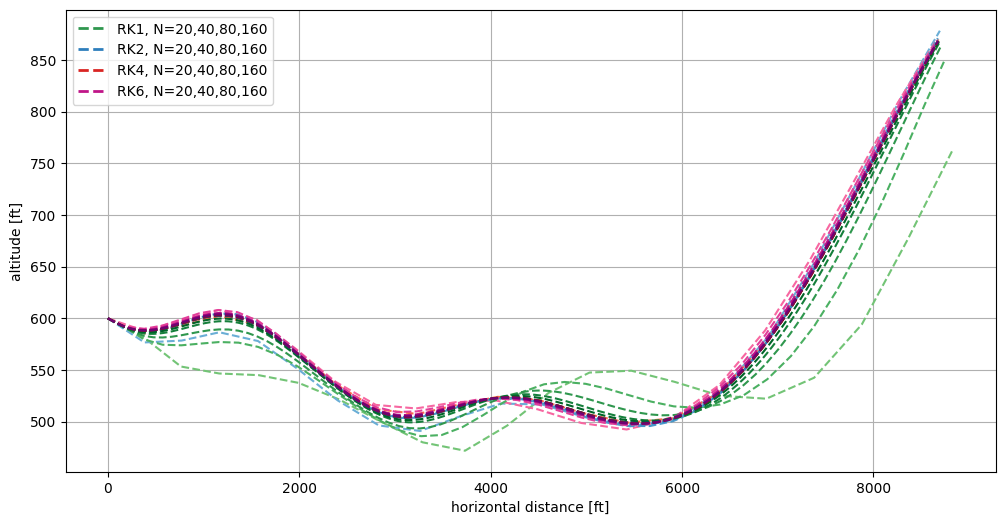

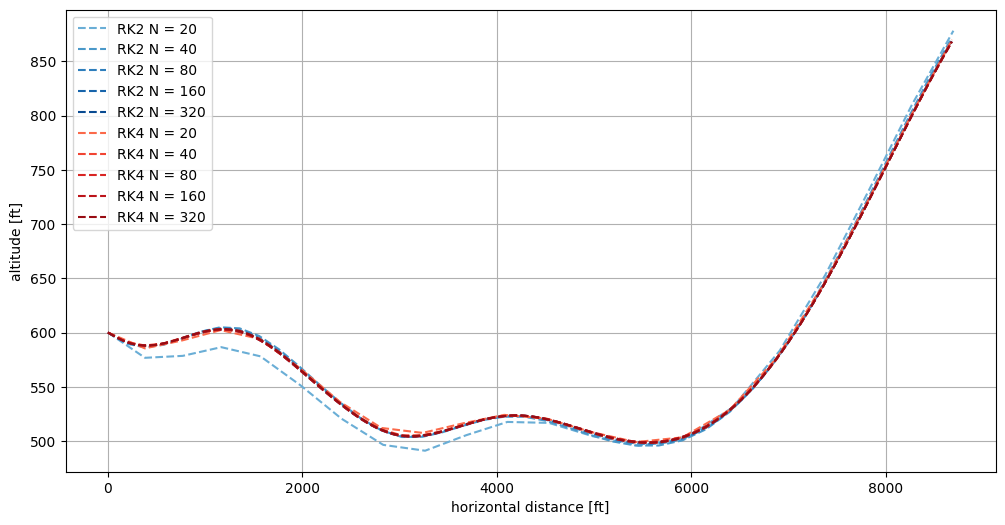

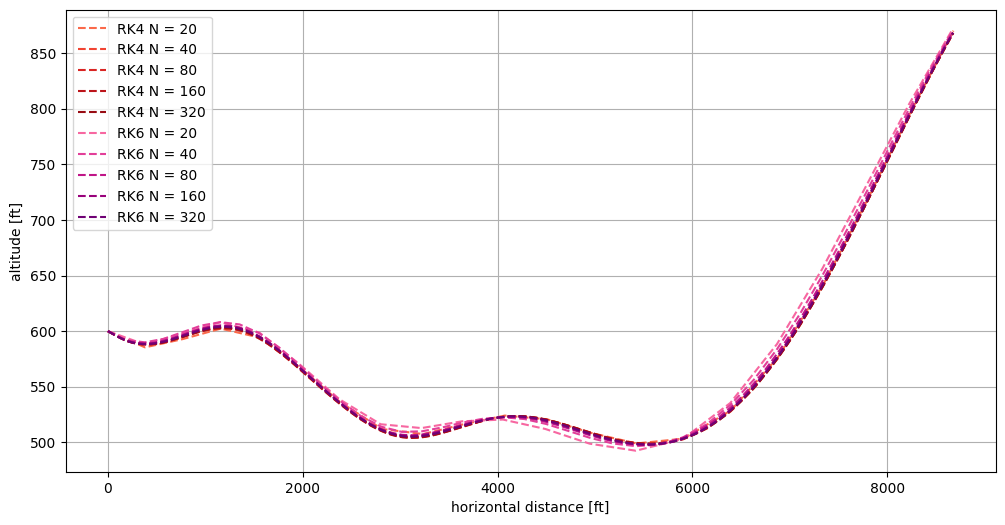

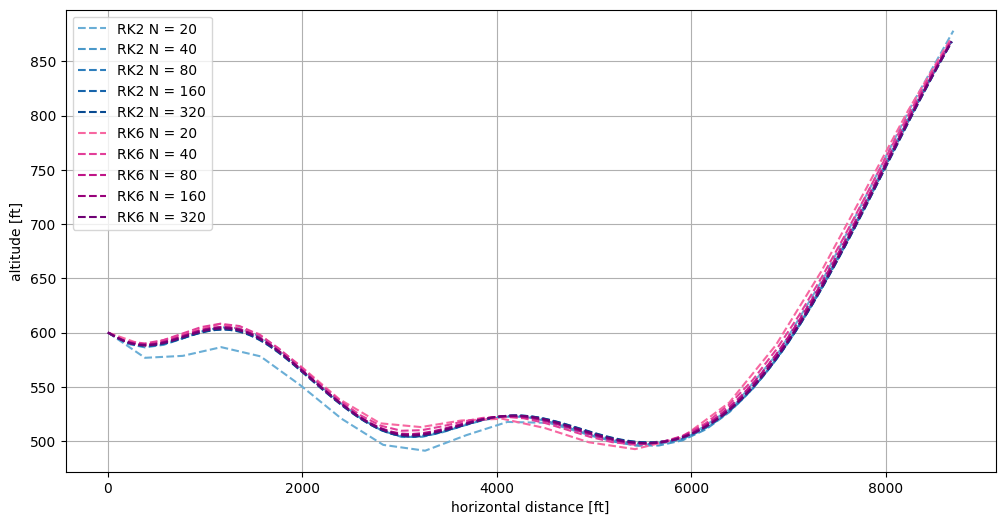

In [262]:

plt.figure(figsize=(12, 6))
for i in range(5):
    color2 = cm.Blues(0.5 + 0.1 * i)
    plt.plot(sol2s[i]['x'], sol2s[i]['h'], '--', label=f'RK2 N = {N*2**i}',color=color2)
for i in range(5):
    color3 = cm.Reds(0.5 + 0.1 * i)
    plt.plot(sol3s[i]['x'], sol3s[i]['h'], '--', label=f'RK4 N = {N*2**i}',color=color3)
plt.xlabel('horizontal distance [ft]')
plt.ylabel('altitude [ft]')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
for i in range(5):
    color3 = cm.Reds(0.5 + 0.1 * i)
    plt.plot(sol3s[i]['x'], sol3s[i]['h'], '--', label=f'RK4 N = {N*2**i}',color=color3)
for i in range(5):
    color4 = cm.RdPu(0.5 + 0.1 * i)
    plt.plot(sol4s[i]['x'], sol4s[i]['h'], '--', label=f'RK6 N = {N*2**i}',color=color4)
plt.xlabel('horizontal distance [ft]')
plt.ylabel('altitude [ft]')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
for i in range(5):
    color2 = cm.Blues(0.5 + 0.1 * i)
    plt.plot(sol2s[i]['x'], sol2s[i]['h'], '--', label=f'RK2 N = {N*2**i}',color=color2)
for i in range(5):
    color4 = cm.RdPu(0.5 + 0.1 * i)
    plt.plot(sol4s[i]['x'], sol4s[i]['h'], '--', label=f'RK6 N = {N*2**i}',color=color4)
plt.xlabel('horizontal distance [ft]')
plt.ylabel('altitude [ft]')
plt.legend()
plt.grid()
plt.show()




# Numerical Study N_u
We want to test the obtained optimal control and see how the number of discretization points effect the solution. We therefore compute the optimal control for larger and larger N_u, we then compute a more exact state trajectory with the obatined control using a very smalltime step. We then compare the solutions to each other as well as to a solution with a very large N_u.


In [42]:
# Parameters
k = 1.2
s = (1/k)**2
# Wind
A_w = model.A_wm1       # wm1, wm1s, wm2
B_w = model.B_wm1       # wm1, wm1s, wm2
# Integrator
integrator = model.rk4_step
integrator_re_comp = model.rk4_step_bolza


N_list = [20,40,80,160,320,640]
N_gros = N_list[-1]*2**3
N_list.append(N_gros)
M = len(N_list)

sols = []
Js = []
min_h = []


# {'x': X[0::5],'h': X[1::5],'v': X[2::5],'gamma': X[3::5],'alpha': X[4::5],'u':U,'t_grid':T, 'hdotdot': H_dotdot, 'J': J}

for j in range(M):
    N = N_list[j]
    w, J = model.solver_min_h_scaled(k_value=k,s_value=s,A_w=A_w,B_w=B_w,N=N,integrator=integrator, pesch_end_cond=True)
    Js.append(J.item())
    sol = model.trajectory_computation_dictonary(model.u_opt_return(w,False,True),k_value=k,s_value=s,A_w=A_w,B_w=B_w,multiplier=int(N_gros/N),N_org=N,integrator=integrator_re_comp)
    sols.append(sol)
    


Total number of variables............................:      121
                     variables with only lower bounds:       21
                variables with lower and upper bounds:       40
                     variables with only upper bounds:        0
Total number of equality constraints.................:      101
Total number of inequality constraints...............:       40
        inequality constraints with only lower bounds:       20
   inequality constraints with lower and upper bounds:       20
        inequality constraints with only upper bounds:        0


Number of Iterations....: 28

                                   (scaled)                 (unscaled)
Objective...............:  -3.2598117606083715e-01   -3.2598117606083715e-01
Dual infeasibility......:   1.1980416658730050e-12    1.1980416658730050e-12
Constraint violation....:   8.0705442329076504e-12    8.0705442329076504e-12
Variable bound violation:   2.9693051573076445e-08    2.9693051573076445e-08
Complementari

CasADi - 2025-07-23 10:36:11 WARNING("KeyboardInterruptException") [.../casadi/interfaces/ipopt/ipopt_nlp.cpp:196]


SystemError: <built-in function Function_call> returned a result with an exception set

N:  [20, 40, 80, 160, 320, 640, 5120]
For Bolza:
Obtained J:  [-0.5896741869529908, -0.5896026184134552, -0.5891260047949017, -0.5889704677815684, -0.5889568165379301, -0.5889399477790275, -0.5889394827595829]
Recomputed J:  [6.459842496166721e+16, 6.388702860236258e+16, 6.411416869637112e+16, 6.3852636348596024e+16, 6.391725292242986e+16, 6.383972546038545e+16, 6.382671819361599e+16]
 
For min h:
N:  [20, 40, 80, 160, 320, 640, 5120]
Obtained min h:  [-589.6741869529908, -589.6026184134552, -589.1260047949017, -588.9704677815683, -588.9568165379301, -588.9399477790274, -588.9394827595828]
Recomputed min h:  [588.9394904407546, 588.9394904374437, 588.9334311994974, 588.9394903972333, 588.9393267134024, 588.9394902109177, 588.9394727686748]


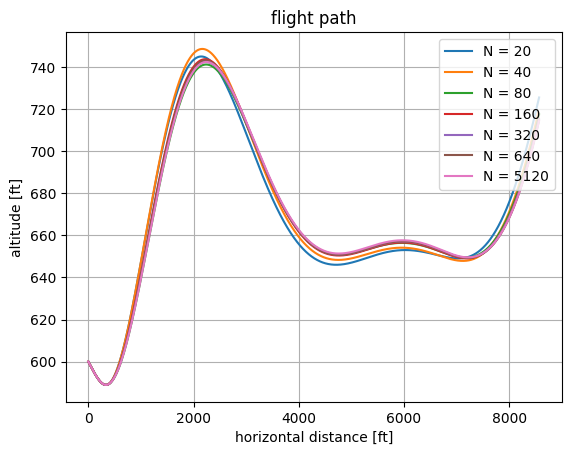

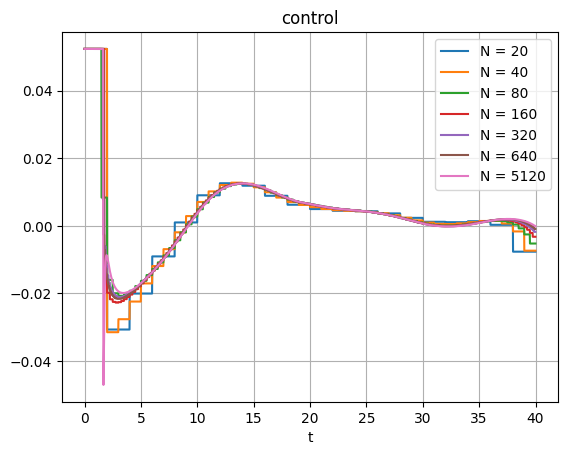

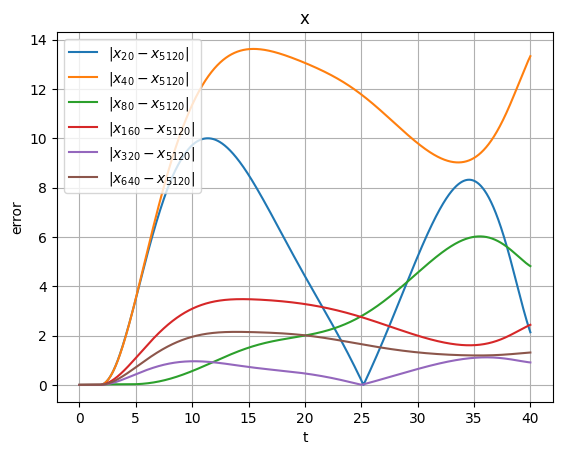

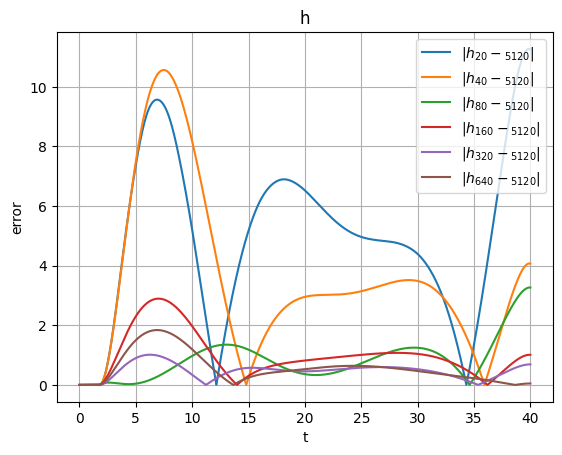

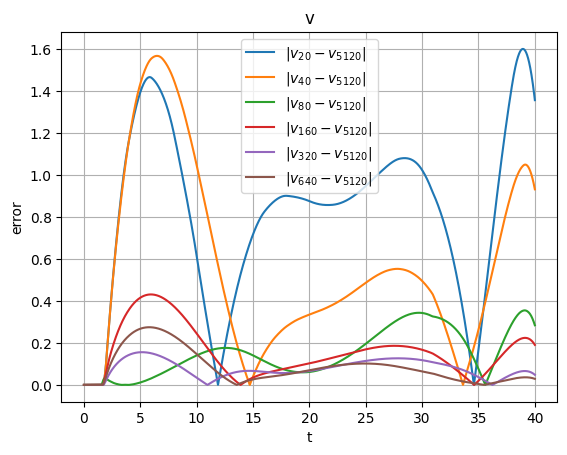

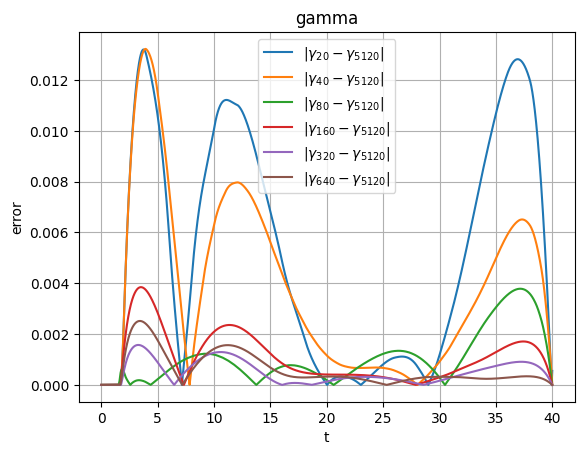

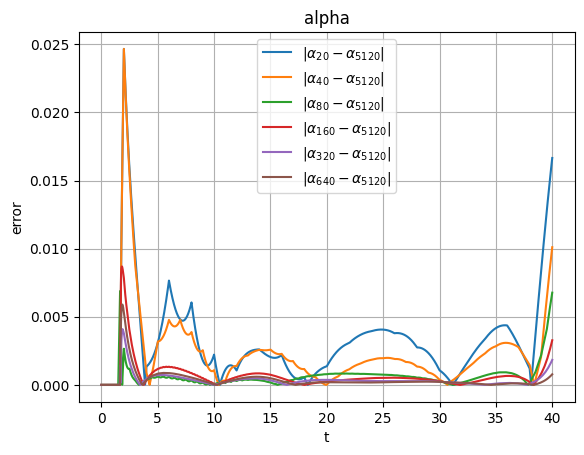

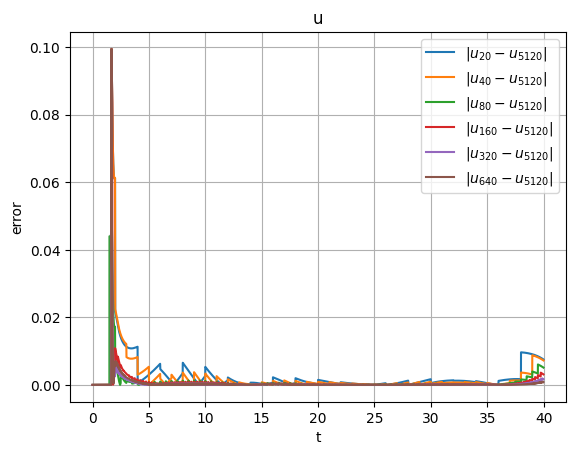

In [41]:
T = sols[-1]['t_grid']
start_index = 0

Js_re = []
min_h_re = []
min_h = []

for i in range(M):
    Js_re.append(float(sols[i]['J']))
    min_h_re.append(float(min(sols[i]['h'])))
    min_h.append(float(Js[i]*(model.params.inv_scale_h)))

print("N: ", N_list)
print("For Bolza:")
print("Obtained J: ", Js)
print("Recomputed J: ", Js_re)
print(" ")
print("For min h:")
print("N: ", N_list)
print("Obtained min h: ", min_h)
print("Recomputed min h: ", min_h_re)

plt.figure()
for i in range(start_index,M):
    plt.plot(sols[i]['x'],sols[i]['h'], label=f"N = {N_list[i]}")
plt.grid(True)
plt.legend()
plt.title('flight path')
plt.xlabel('horizontal distance [ft]')
plt.ylabel('altitude [ft]')
plt.show()

plt.figure()
for i in range(start_index,M):
    plt.plot(T[:-1],sols[i]['u'], label=f"N = {N_list[i]}")
plt.grid(True)
plt.legend()
plt.title('control')
plt.xlabel('t')
plt.show()

# Errors
plt.figure()
for i in range(start_index,M-1):
    plt.plot(T,abs(np.array(sols[i]['x'])-np.array(sols[-1]['x'])), label=fr"$|x_{{{N_list[i]}}} - x_{{{N_gros}}}|$")
plt.grid(True)
plt.legend()
plt.title('x')
plt.xlabel('t')
plt.ylabel('error')
plt.show()

plt.figure()
for i in range(start_index,M-1):
    plt.plot(T,abs(np.array(sols[i]['h'])-np.array(sols[-1]['h'])), label=fr"$|h_{{{N_list[i]}}} - _{{{N_gros}}}|$")
plt.grid(True)
plt.legend()
plt.title('h')
plt.xlabel('t')
plt.ylabel('error')
plt.show()

plt.figure()
for i in range(start_index,M-1):
    plt.plot(T,abs(np.array(sols[i]['v'])-np.array(sols[-1]['v'])), label=fr"$|v_{{{N_list[i]}}} - v_{{{N_gros}}}|$")
plt.grid(True)
plt.legend()
plt.title('v')
plt.xlabel('t')
plt.ylabel('error')
plt.show()

plt.figure()
for i in range(start_index,M-1):
    plt.plot(T,abs(np.array(sols[i]['gamma'])-np.array(sols[-1]['gamma'])), label=fr"$|\gamma_{{{N_list[i]}}} - \gamma_{{{N_gros}}}|$")
plt.grid(True)
plt.legend()
plt.title('gamma')
plt.xlabel('t')
plt.ylabel('error')
plt.show()

plt.figure()
for i in range(start_index,M-1):
    plt.plot(T,abs(np.array(sols[i]['alpha'])-np.array(sols[-1]['alpha'])), label=fr"$|\alpha_{{{N_list[i]}}} - \alpha_{{{N_gros}}}|$")
plt.grid(True)
plt.legend()
plt.title('alpha')
plt.xlabel('t')
plt.ylabel('error')
plt.show()

plt.figure()
for i in range(start_index,M-1):
    plt.plot(T[:-1],abs(np.array(sols[i]['u'])-np.array(sols[-1]['u'])), label=fr"$|u_{{{N_list[i]}}} - u_{{{N_gros}}}|$")
plt.grid(True)
plt.legend()
plt.title('u')
plt.xlabel('t')
plt.ylabel('error')
plt.show()



In [315]:
k=1
s=1
pec=True
integrator=model.rk4_step
A_w=model.A_wm1
B_w=model.B_wm1

N_list = list(range(40, 251, 10))
M = len(N_list)
J_list = []
h_list = []

for i in range(M):
    N = N_list[i]
    w,J = model.solver_min_h_scaled(k_value=k,s_value=s,A_w=A_w,B_w=B_w,N=N,pesch_end_cond=pec,integrator=integrator)
    J_list.append(abs(J))
    h_list.append(model.params.tf/(N_list[i]))
    
w,J = model.solver_min_h_scaled(k_value=k,s_value=s,A_w=A_w,B_w=B_w,N=N_list[-1]*4,pesch_end_cond=pec,integrator=integrator)
J_list.append(abs(J))
h_list.append(model.params.tf/(N_list[-1]*4))

err_list = []

for i in range(M):
    err_list.append(abs(J_list[-1]-J_list[i]))


Total number of variables............................:      241
                     variables with only lower bounds:       41
                variables with lower and upper bounds:       80
                     variables with only upper bounds:        0
Total number of equality constraints.................:      201
Total number of inequality constraints...............:       80
        inequality constraints with only lower bounds:       40
   inequality constraints with lower and upper bounds:       40
        inequality constraints with only upper bounds:        0


Number of Iterations....: 24

                                   (scaled)                 (unscaled)
Objective...............:  -5.0907623060438001e-01   -5.0907623060438001e-01
Dual infeasibility......:   2.2146173783710366e-13    2.2146173783710366e-13
Constraint violation....:   6.1266547390914639e-12    6.1266547390914639e-12
Variable bound violation:   2.9250139643721695e-08    2.9250139643721695e-08
Complementari

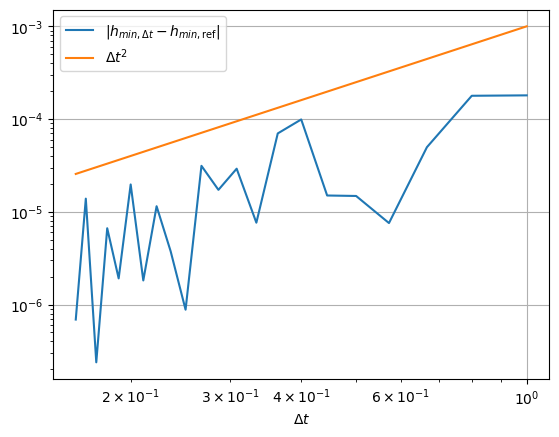

In [318]:

h_list2 = [0.001*x**2 for x in h_list[:-1]]

plt.figure()
plt.loglog(h_list[:-1],err_list, label=r"$|h_{min,\Delta t} - h_{min,\mathrm{ref}}|$")
plt.loglog(h_list[:-1],h_list2, label=r"$\Delta t^2$")
plt.grid(True)
plt.legend()
plt.xlabel(r"$\Delta t$")
plt.show()


In [131]:
k=1.2
s=1/k**2

pec=False
A_w=model.A_wm1
B_w=model.B_wm1
# Integrator
integrator = model.rk4_step_bolza
integrator_re_comp = model.rk4_step_bolza


N_list = [20,40,80,160,320,640]
N_gros = N_list[-1]*2**2
N_list.append(N_gros)
M = len(N_list)

sols = []
Js_ob = []
Js_recom = []
h_min_ob = []
h_min_recom = []


for j in range(M):
    N = N_list[j]
    w, J = model.solver_bolza_scaled(k_value=k,s_value=s,A_w=A_w,B_w=B_w,N=N,integrator=integrator, pesch_end_cond=pec)
    Js_ob.append(J.item()*model.params.inv_scale_Q)
    h_min_ob.append(float(abs(J)*model.params.inv_scale_h))
    sol = model.trajectory_computation_dictonary(model.u_opt_return(w,True,True),k_value=k,s_value=s,A_w=A_w,B_w=B_w,multiplier=int(N_list[-1]/N),N_org=N,integrator=integrator_re_comp)
    Js_recom.append(float(sol['J']))
    h_min_recom.append(float(min(sol['h'])))
    sols.append(sol)
    
print(N_list)
print(Js_ob)
print(Js_recom)
print(" ")
print(N_list)
print(h_min_ob)
print(h_min_recom)


Total number of variables............................:      121
                     variables with only lower bounds:       21
                variables with lower and upper bounds:       40
                     variables with only upper bounds:        0
Total number of equality constraints.................:      100
Total number of inequality constraints...............:       41
        inequality constraints with only lower bounds:       21
   inequality constraints with lower and upper bounds:       20
        inequality constraints with only upper bounds:        0


Number of Iterations....: 28

                                   (scaled)                 (unscaled)
Objective...............:  -3.2598117606083665e-01   -3.2598117606083665e-01
Dual infeasibility......:   1.1971534874533057e-12    1.1971534874533057e-12
Constraint violation....:   8.0702111660002629e-12    8.0702111660002629e-12
Variable bound violation:   2.9693051573076445e-08    2.9693051573076445e-08
Complementari

N:  [20, 40, 80, 160, 320, 640, 2560]
For Bolza:
Obtained J:  [1.7669547355297318e+18, 1.8063663688008376e+18, 1.8111783009286953e+18, 1.8121175572644408e+18, 1.8121313516834947e+18, 1.8120995027074511e+18, 1.812136463662319e+18]
Recomputed J:  [1.8230443432282196e+18, 1.8144807311386266e+18, 1.8124266883082373e+18, 1.8122132522802772e+18, 1.8121447556010934e+18, 1.8121387550997865e+18, 1.8121364636623675e+18]
 
For min h:
N:  [20, 40, 80, 160, 320, 640, 2560]
Obtained min h:  [1.7669547355297318e+21, 1.8063663688008377e+21, 1.8111783009286952e+21, 1.812117557264441e+21, 1.8121313516834946e+21, 1.812099502707451e+21, 1.8121364636623191e+21]
Recomputed min h:  [297.85555443614044, 287.6803561271704, 293.53402238463326, 292.71307847626576, 291.4808565267797, 291.69032745799296, 291.8390216398037]


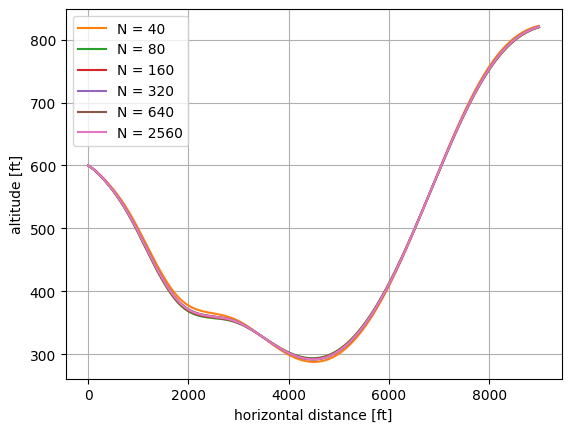

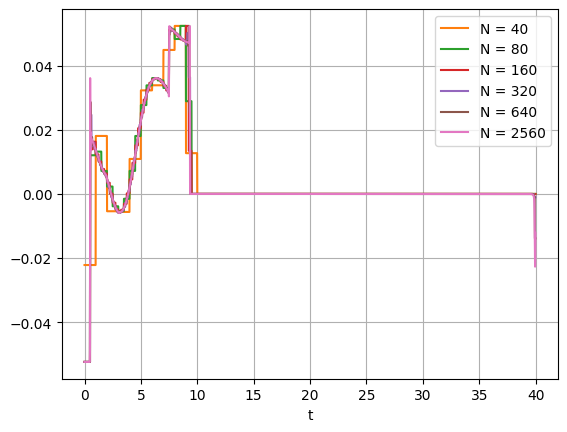

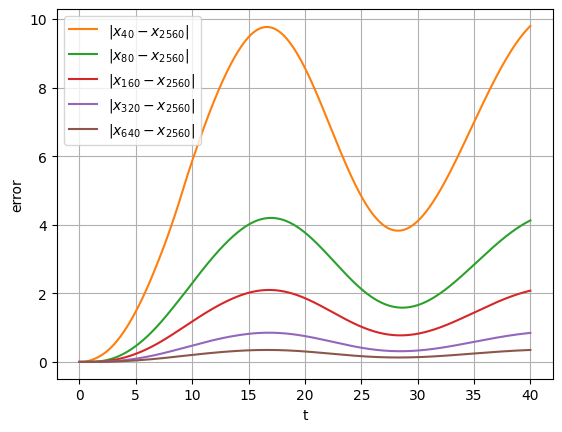

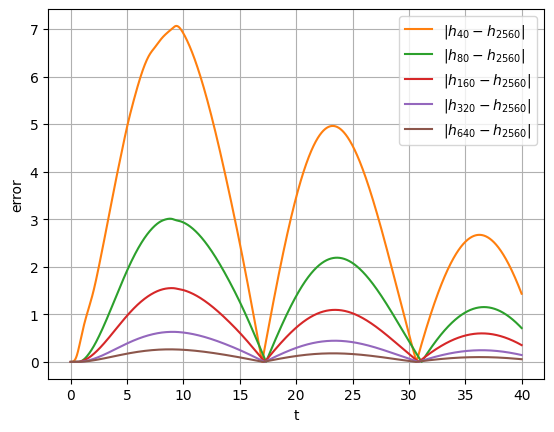

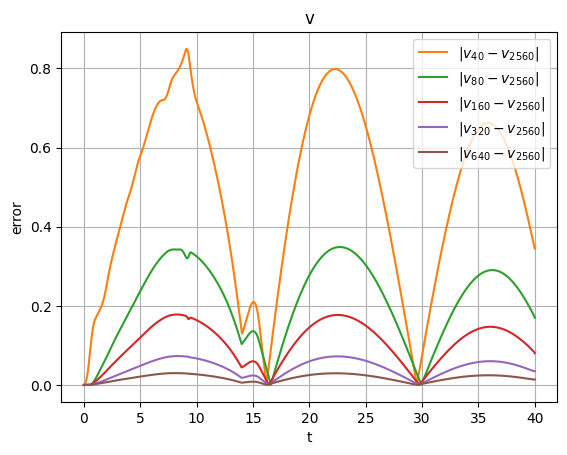

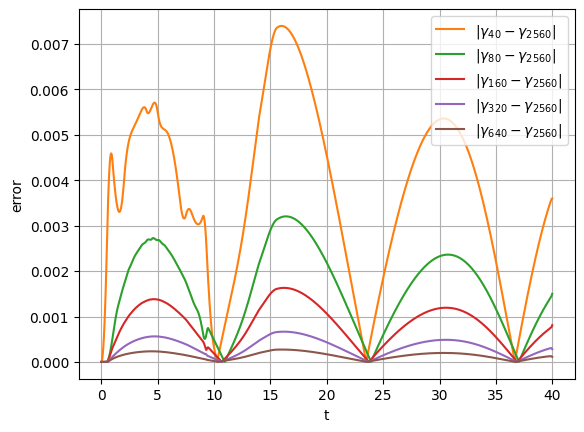

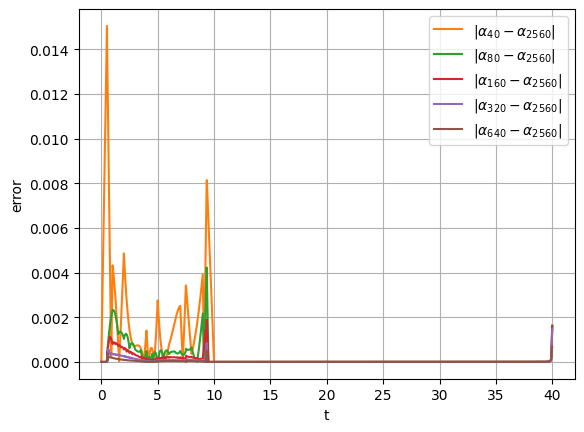

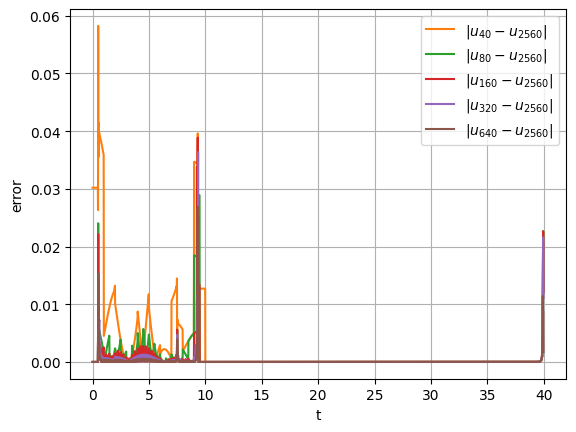

In [84]:
colors = ['#1f77b4',  # blue
 '#ff7f0e',  # orange
 '#2ca02c',  # green
 '#d62728',  # red
 '#9467bd',  # purple
 '#8c564b',  # brown
 '#e377c2',  # pink
 '#7f7f7f',  # gray
 '#bcbd22',  # yellow-green
 '#17becf']  # cyan

T = sols[-1]['t_grid']
start_index = 1

Js = Js_ob
Js_re = []
min_h_re = []
min_h = []

for i in range(M):
    Js_re.append(float(sols[i]['J']))
    min_h_re.append(float(min(sols[i]['h'])))
    min_h.append(float(Js[i]*(model.params.inv_scale_h)))

print("N: ", N_list)
print("For Bolza:")
print("Obtained J: ", Js)
print("Recomputed J: ", Js_re)
print(" ")
print("For min h:")
print("N: ", N_list)
print("Obtained min h: ", min_h)
print("Recomputed min h: ", min_h_re)

plt.figure()
for i in range(start_index,M):
    plt.plot(sols[i]['x'],sols[i]['h'], label=f"N = {N_list[i]}",color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('horizontal distance [ft]')
plt.ylabel('altitude [ft]')
plt.show()

plt.figure()
for i in range(start_index,M):
    plt.plot(T[:-1],sols[i]['u'], label=f"N = {N_list[i]}",color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.show()

# Errors
plt.figure()
for i in range(start_index,M-1):
    plt.plot(T,abs(np.array(sols[i]['x'])-np.array(sols[-1]['x'])), label=fr"$|x_{{{N_list[i]}}} - x_{{{N_gros}}}|$",color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('error')
plt.show()

plt.figure()
for i in range(start_index,M-1):
    plt.plot(T,abs(np.array(sols[i]['h'])-np.array(sols[-1]['h'])), label=fr"$|h_{{{N_list[i]}}} - h_{{{N_gros}}}|$",color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('error')
plt.show()

plt.figure()
for i in range(start_index,M-1):
    plt.plot(T,abs(np.array(sols[i]['v'])-np.array(sols[-1]['v'])), label=fr"$|v_{{{N_list[i]}}} - v_{{{N_gros}}}|$",color=colors[i])
plt.grid(True)
plt.legend()
plt.title('v')
plt.xlabel('t')
plt.ylabel('error')
plt.show()

plt.figure()
for i in range(start_index,M-1):
    plt.plot(T,abs(np.array(sols[i]['gamma'])-np.array(sols[-1]['gamma'])), label=fr"$|\gamma_{{{N_list[i]}}} - \gamma_{{{N_gros}}}|$",color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('error')
plt.show()

plt.figure()
for i in range(start_index,M-1):
    plt.plot(T,abs(np.array(sols[i]['alpha'])-np.array(sols[-1]['alpha'])), label=fr"$|\alpha_{{{N_list[i]}}} - \alpha_{{{N_gros}}}|$",color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('error')
plt.show()

plt.figure()
for i in range(start_index,M-1):
    plt.plot(T[:-1],abs(np.array(sols[i]['u'])-np.array(sols[-1]['u'])), label=fr"$|u_{{{N_list[i]}}} - u_{{{N_gros}}}|$",color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('error')
plt.show()



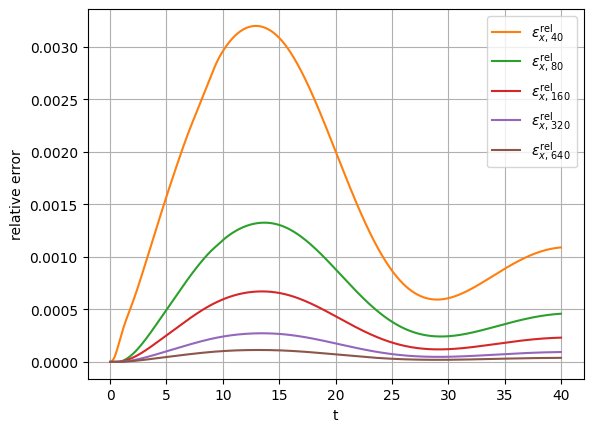

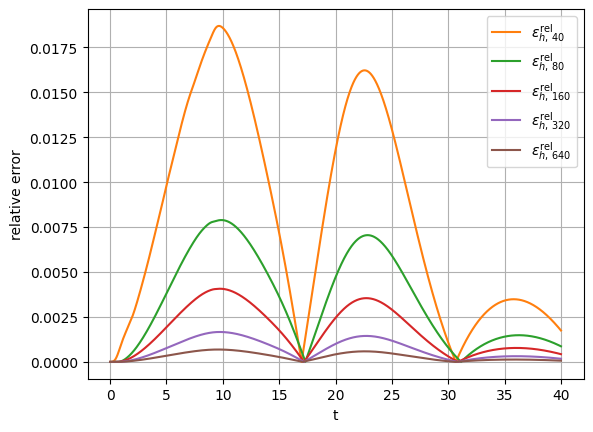

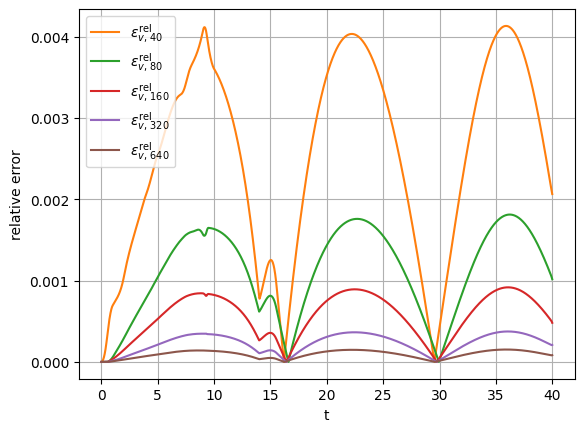

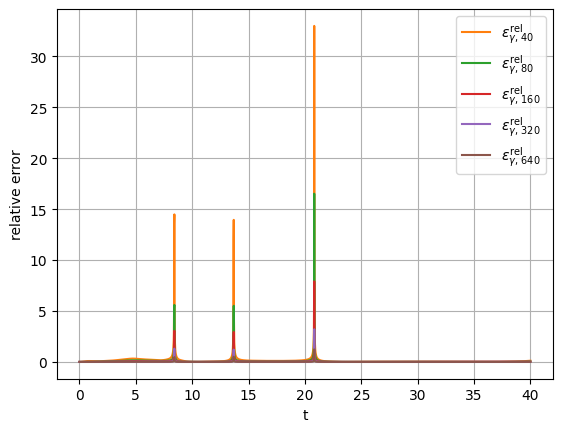

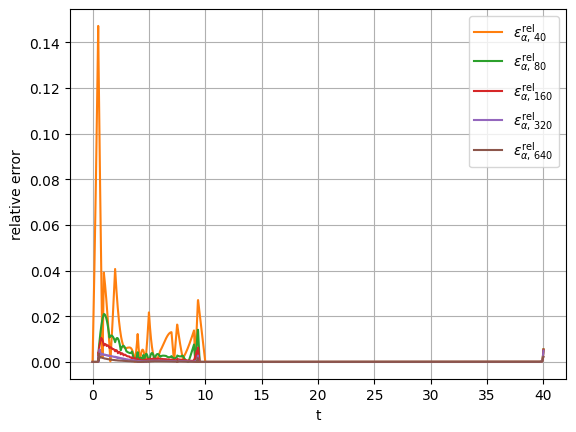

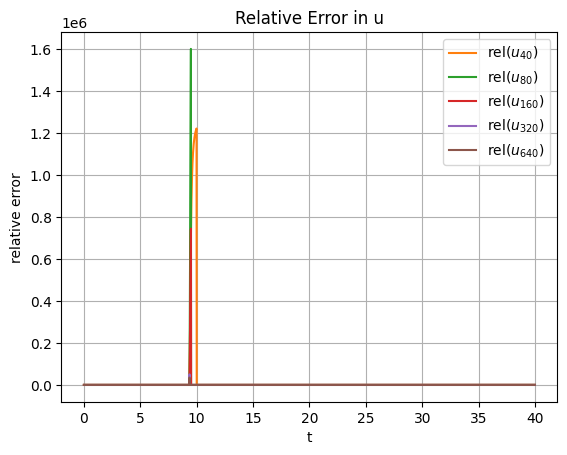

In [85]:
epsilon = 1e-8  # Small value to prevent division by zero
start_index = 1

# Relative Errors
plt.figure()
for i in range(start_index, M-1):
    rel_err = abs(np.array(sols[i]['x']) - np.array(sols[-1]['x'])) / (abs(np.array(sols[-1]['x'])) + epsilon)
    plt.plot(T, rel_err, label=fr'$\varepsilon^{{\mathrm{{rel}}}}_{{x,\,{N_list[i]}}}$',color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('relative error')
plt.show()

plt.figure()
for i in range(start_index, M-1):
    rel_err = abs(np.array(sols[i]['h']) - np.array(sols[-1]['h'])) / (abs(np.array(sols[-1]['h'])) + epsilon)
    plt.plot(T, rel_err, label=fr'$\varepsilon^{{\mathrm{{rel}}}}_{{h,\,{N_list[i]}}}$',color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('relative error')
plt.show()

plt.figure()
for i in range(start_index, M-1):
    rel_err = abs(np.array(sols[i]['v']) - np.array(sols[-1]['v'])) / (abs(np.array(sols[-1]['v'])) + epsilon)
    plt.plot(T, rel_err, label=fr'$\varepsilon^{{\mathrm{{rel}}}}_{{v,\,{N_list[i]}}}$',color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('relative error')
plt.show()

plt.figure()
for i in range(start_index, M-1):
    rel_err = abs(np.array(sols[i]['gamma']) - np.array(sols[-1]['gamma'])) / (abs(np.array(sols[-1]['gamma'])) + epsilon)
    plt.plot(T, rel_err, label=fr'$\varepsilon^{{\mathrm{{rel}}}}_{{\gamma,\,{N_list[i]}}}$',color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('relative error')
plt.show()

plt.figure()
for i in range(start_index, M-1):
    rel_err = abs(np.array(sols[i]['alpha']) - np.array(sols[-1]['alpha'])) / (abs(np.array(sols[-1]['alpha'])) + epsilon)
    plt.plot(T, rel_err, label=fr'$\varepsilon^{{\mathrm{{rel}}}}_{{\alpha,\,{N_list[i]}}}$',color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('relative error')
plt.show()

plt.figure()
for i in range(start_index, M-1):
    rel_err = abs(np.array(sols[i]['u']) - np.array(sols[-1]['u'])) / (abs(np.array(sols[-1]['u'])) + epsilon)
    plt.plot(T[:-1], rel_err, label=fr"$\mathrm{{rel}}(u_{{{N_list[i]}}})$",color=colors[i])
plt.grid(True)
plt.legend()
plt.title('Relative Error in u')
plt.xlabel('t')
plt.ylabel('relative error')
plt.show()

In [158]:
k=1
s=1/k**2
pec=False
A_w=model.A_wm1
B_w=model.B_wm1
# Integrator
integrator = model.rk2_step_bolza
integrator_re_comp = model.rk2_step_bolza


N_list = [160,320]
N_gros = int(N_list[-1])
M = len(N_list)

sols = []
Js_ob = []
Js_recom = []
h_min_ob = []
h_min_recom = []


for j in range(M):
    N = N_list[j]
    w, J = model.solver_bolza_scaled(k_value=k,s_value=s,A_w=A_w,B_w=B_w,N=N,integrator=integrator, pesch_end_cond=pec,constr_viol_tol=1e-12)
    Js_ob.append(J.item()*model.params.inv_scale_Q)
    h_min_ob.append(float(abs(J)*model.params.inv_scale_h))
    sol = model.trajectory_computation_dictonary(model.u_opt_return(w,True,True),k_value=k,s_value=s,A_w=A_w,B_w=B_w,multiplier=int(N_list[-1]/N),N_org=N,integrator=integrator_re_comp)
    Js_recom.append(float(sol['J']))
    h_min_recom.append(float(min(sol['h'])))
    sols.append(sol)
    
print(N_list)
print(Js_ob)
print(Js_recom)
print(" ")
print(N_list)
print(h_min_ob)



Total number of variables............................:      960
                     variables with only lower bounds:      160
                variables with lower and upper bounds:      320
                     variables with only upper bounds:        0
Total number of equality constraints.................:      800
Total number of inequality constraints...............:      161
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:      160
        inequality constraints with only upper bounds:        0


Number of Iterations....: 34

                                   (scaled)                 (unscaled)
Objective...............:   3.3373763164682333e+00    3.3373763164682333e+00
Dual infeasibility......:   9.8909595791507599e-15    9.8909595791507599e-15
Constraint violation....:   1.6875389974302379e-14    1.6875389974302379e-14
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementari

In [159]:


J_vals = []
J_vals_violations = []

tol = 1e-8
constr_viol_tol = 1e-6


if min(sols[0]['hdotdot'])<-2*model.params.g:
    print("1")
if min(sols[0]['hdotdot'])>10*model.params.g:
    print("2")
if max(sols[0]['alpha'])>model.params.alphamax+constr_viol_tol:
    print("3") 
if pec is True and (sols[0]['gamma'][-1]<7.431 * pi / 180-(constr_viol_tol) or sols[0]['gamma'][-1]>7.431 * pi / 180+(constr_viol_tol)):
    print("4")
if pec is False and sols[0]['gamma'][-1]<-(constr_viol_tol):
    print("5") 
    
if min(sols[1]['hdotdot'])<-2*model.params.g:
    print("1a")
if min(sols[1]['hdotdot'])>10*model.params.g:
    print("2a")
if max(sols[1]['alpha'])>model.params.alphamax+constr_viol_tol:
    print("3a") 
if pec is True and (sols[1]['gamma'][-1]<7.431 * pi / 180-(constr_viol_tol) or sols[1]['gamma'][-1]>7.431 * pi / 180+(constr_viol_tol)):
    print("4a")
if pec is False and sols[1]['gamma'][-1]<-(constr_viol_tol):
    print("5a") 


N:  [160, 320]
For Bolza:
Obtained J:  [3.3373763164682336e+17, 3.335502041682714e+17]
Recomputed J:  [3.335490737233952e+17, 3.3355020416826534e+17]
 
For min h:
N:  [160, 320]
Obtained min h:  [3.3373763164682335e+20, 3.335502041682714e+20]
Recomputed min h:  [498.50480835259674, 498.77656807818477]


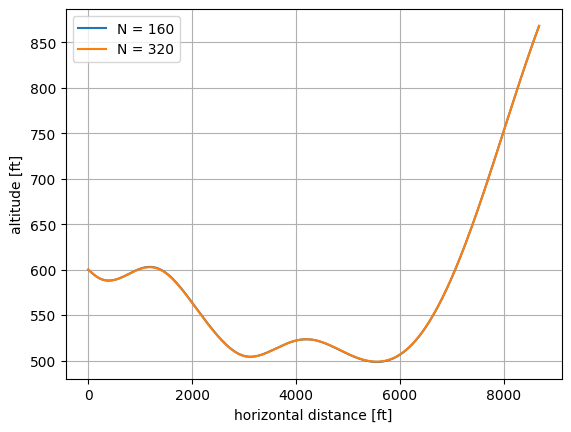

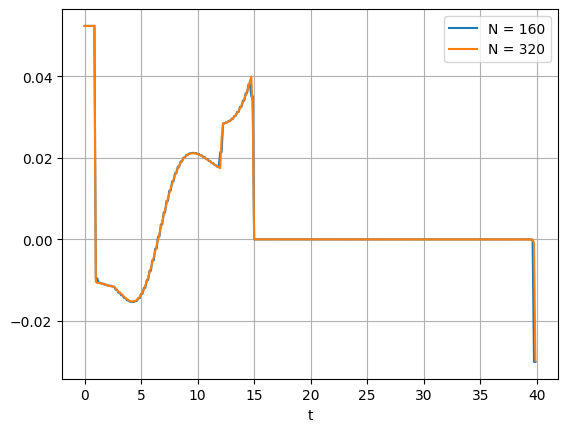

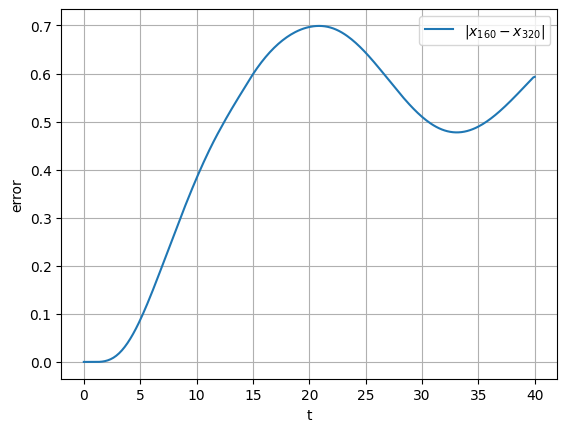

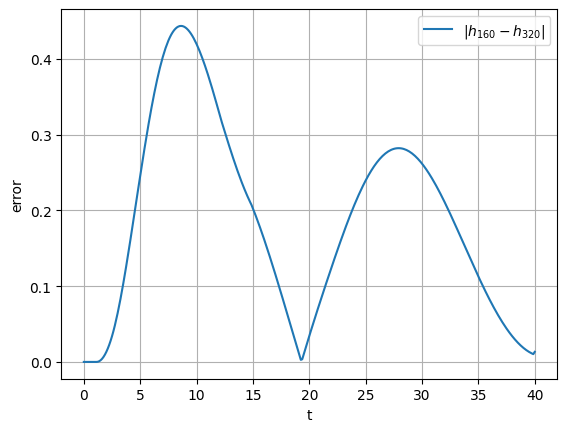

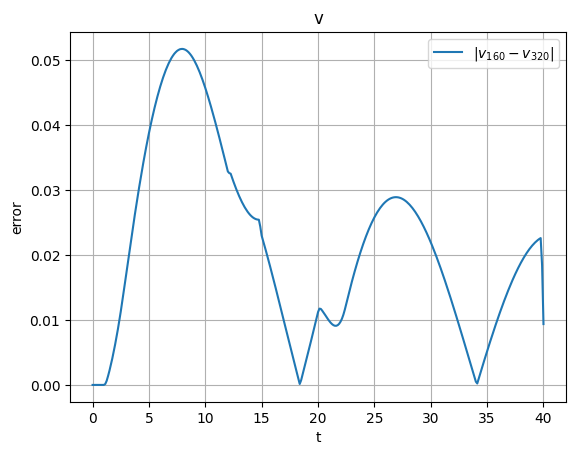

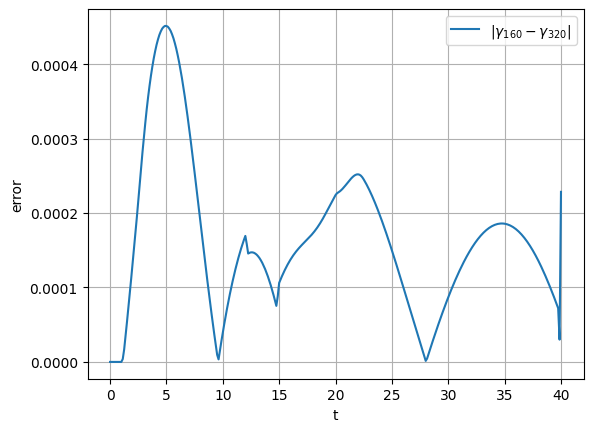

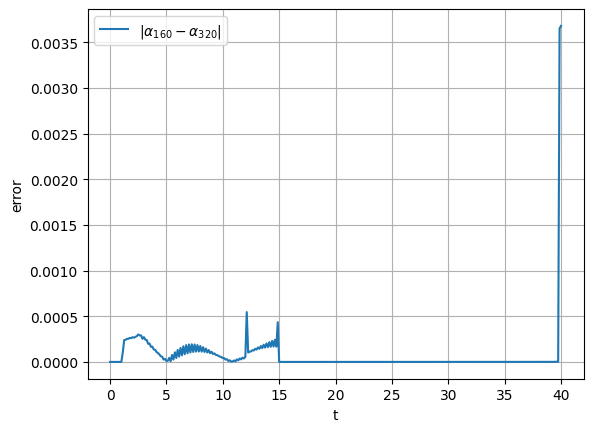

In [160]:
colors = ['#1f77b4',  # blue
 '#ff7f0e',  # orange
 '#2ca02c',  # green
 '#d62728',  # red
 '#9467bd',  # purple
 '#8c564b',  # brown
 '#e377c2',  # pink
 '#7f7f7f',  # gray
 '#bcbd22',  # yellow-green
 '#17becf']  # cyan

T = sols[-1]['t_grid']
start_index = 0

Js = Js_ob
Js_re = []
min_h_re = []
min_h = []

for i in range(M):
    Js_re.append(float(sols[i]['J']))
    min_h_re.append(float(min(sols[i]['h'])))
    min_h.append(float(Js[i]*(model.params.inv_scale_h)))

print("N: ", N_list)
print("For Bolza:")
print("Obtained J: ", Js)
print("Recomputed J: ", Js_re)
print(" ")
print("For min h:")
print("N: ", N_list)
print("Obtained min h: ", min_h)
print("Recomputed min h: ", min_h_re)

plt.figure()
for i in range(start_index,M):
    plt.plot(sols[i]['x'],sols[i]['h'], label=f"N = {N_list[i]}",color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('horizontal distance [ft]')
plt.ylabel('altitude [ft]')
plt.show()

plt.figure()
for i in range(start_index,M):
    plt.plot(T[:-1],sols[i]['u'], label=f"N = {N_list[i]}",color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.show()

# Errors
plt.figure()
for i in range(start_index,M-1):
    plt.plot(T,abs(np.array(sols[i]['x'])-np.array(sols[-1]['x'])), label=fr"$|x_{{{N_list[i]}}} - x_{{{N_gros}}}|$",color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('error')
plt.show()

plt.figure()
for i in range(start_index,M-1):
    plt.plot(T,abs(np.array(sols[i]['h'])-np.array(sols[-1]['h'])), label=fr"$|h_{{{N_list[i]}}} - h_{{{N_gros}}}|$",color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('error')
plt.show()

plt.figure()
for i in range(start_index,M-1):
    plt.plot(T,abs(np.array(sols[i]['v'])-np.array(sols[-1]['v'])), label=fr"$|v_{{{N_list[i]}}} - v_{{{N_gros}}}|$",color=colors[i])
plt.grid(True)
plt.legend()
plt.title('v')
plt.xlabel('t')
plt.ylabel('error')
plt.show()

plt.figure()
for i in range(start_index,M-1):
    plt.plot(T,abs(np.array(sols[i]['gamma'])-np.array(sols[-1]['gamma'])), label=fr"$|\gamma_{{{N_list[i]}}} - \gamma_{{{N_gros}}}|$",color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('error')
plt.show()

plt.figure()
for i in range(start_index,M-1):
    plt.plot(T,abs(np.array(sols[i]['alpha'])-np.array(sols[-1]['alpha'])), label=fr"$|\alpha_{{{N_list[i]}}} - \alpha_{{{N_gros}}}|$",color=colors[i])
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('error')
plt.show()



